# Spotify Analysis: Study of song factors and the positive correlation to streaming

## Members
- Joey Beightol
- Ryan Lucero
- Matthew Parker

## Dataset and Motivation
Over the past few decades, listening and creating music has become a lot more accesible. With this, more and more music is being created, more genres are being developed and more audiences are being reached. With everyone having their own taste in music, we want to explore what makes a song 'good' or 'succesful'. One way to measure success is the amount of streams a song has. To do this we will be utilizng the following two datasets:

- Most Streamed Spotify Songs 2023: This dataset is made up of the 943 most famous songs on Spotify for 2023 and was collected by Kaggle user Nidula Elgiriyewithana (https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data). 
- Spotify Tracks Dataset: This dataset is made up of spotify tracks ranging over 125 different genres. (https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)

The data was collected for exploratory analysis into patterns that may effect overall streams, popularity on specific platforms, trends in musical attributes or preferences etc. 

## Song Feature Details
The data set includes 24 different features:
- track_name: Name of the song
- artist(s)_name: Name of the artist(s) of the song
- artist_count: Number of artists contributing to the song
- released_year: Year when the song was released
- released_month: Month when the song was released
- released_day: Day of the month when the song was released
- in_spotify_playlists: Number of Spotify playlists the song is included in
- in_spotify_charts: Presence and rank of the song on Spotify charts
- streams: Total number of streams on Spotify
- in_apple_playlists: Number of Apple Music playlists the song is included in
- in_apple_charts: Presence and rank of the song on Apple Music charts
- in_deezer_playlists: Number of Deezer playlists the song is included in
- in_deezer_charts: Presence and rank of the song on Deezer charts
- in_shazam_charts: Presence and rank of the song on Shazam charts
- bpm: Beats per minute, a measure of song tempo
- key: Key of the song
- mode: Mode of the song (major or minor)
- danceability_%: Percentage indicating how suitable the song is for dancing
- valence_%: Positivity of the song's musical content
- energy_%: Perceived energy level of the song
- acousticness_%: Amount of acoustic sound in the song
- instrumentalness_%: Amount of instrumental content in the song
- liveness_%: Presence of live performance elements
- speechiness_%: Amount of spoken words in the song
- track_genre
- popularity



## Research Question/Literature Review

Researchers at Carleton University concluded that song features to do not directly correlate to its popluarity, suggesting that contextual factors instead of musical features are stronger indicators of a songs success. Their study also suggestes that elements affecting song popularity change over time (https://newsroom.carleton.ca/story/big-data-predict-song-popularity/).

Researchers at Stanford University came to a similar conclusion. Using a different set of factors and a dataset of one milllion songs dating back to 2011, they found that sonic features of a song were far less predictive of it's popularity than its metadata features (https://cs229.stanford.edu/proj2015/140_report.pdf).

Our goal is to analyze what combination of surveyed factors (danceability, valence, energy, acousticness, instrumentalness, liveness, speechiness, etc.) are most positively correlated with streams for a song on Spotify. We want to explore the conclusion drawn by Carleton and Stanford as well as see if song features correlate positively to streams based on contextual factors such as genre.

In our analysis, we are inputing the two datasets and creating a correlation matrix to see what aspects of songs cause the song to be listened to more (amount of streams). We are also conducting a regression tree analysis on each genre to see exactly what aspects of the highest correlating values lead to the highest streaming songs.


# Data Wrangling

## Import Libraries
The libraries being utilized in this project are:
- pandas: to create and easily manipulate dataframes
- numpy: combined with dataframes to check column information in dataframes
- matplotlib/seaborn: visualize data
- sklearn: utilized for regression tree analysis, lasso regression and mean squared error

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



## Load in Data

In [49]:
# Load data from a CSV file into a DataFrame
spotifyDF = pd.read_csv('spotify-2023.csv', encoding='latin-1')
spotifyLargeDF = pd.read_csv('spotify_large.csv', encoding='latin-1')

## Clean the data

### Most Streamed 2023

In [50]:
# Display the first few rows of the DataFrame
display(spotifyDF.head(5))

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703                  43  ...  125   B  Major   
1                 48  133716286                  48  ...   92  C#  Major   
2                113  140003974                  94  ...  138   F  Major   
3                100  800840817                 116  ...  170   A  Major   
4                 50  303236322                  84  ...  144   A  Minor   

  danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0             80         89       83             31                   0   
1             71         61       74              7                   0   
2             51         32       53             17                   0   
3             55         58       72             11                   0   
4             65         23       80             14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  

[5 rows x 24 columns]

In [51]:
#describe the dataframe
spotifyDF.describe()

artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000           0.000000           13.000000   
50%             2224.000000           3.000000           34.000000   
75%             5542.000000          16.000000           88.000000   
max            52898.000000         147.000000          672.000000   

       in_apple_charts  in_deezer_charts         bpm  danceability_%  \
count       953.000000        953.000000  953.000000       953.00000   
mean         51.908709          2.666317  122.540399        66.96957   
std          50.630241          6.035599   28.057802        14.63061   
min           0.000000          0.000000   65.000000        23.00000   
25%           7.000000          0.000000  100.000000        57.00000   
50%          38.000000          0.000000  121.000000        69.00000   
75%          87.000000          2.000000  140.000000        78.00000   
max         275.000000         58.000000  206.000000        96.00000   

        valence_%    energy_%  acousticness_%  instrumentalness_%  liveness_%  \
count  953.000000  953.000000      953.000000          953.000000  953.000000   
mean    51.431270   64.279119       27.057712            1.581322   18.213012   
std     23.480632   16.550526       25.996077            8.409800   13.711223   
min      4.000000    9.000000        0.000000            0.000000    3.000000   
25%     32.000000   53.000000        6.000000            0.000000   10.000000   
50%     51.000000   66.000000       18.000000            0.000000   12.000000   
75%     70.000000   77.000000       43.000000            0.000000   24.000000   
max     97.000000   97.000000       97.000000           91.000000   97.000000   

       speechiness_%  
count     953.000000  
mean       10.131165  
std         9.912888  
min         2.000000  
25%         4.000000  
50%         6.000000  
75%        11.000000  
max        64.000000

In [52]:
#look at types
spotifyDF.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [53]:
#Check if streams has any value that is not a number
spotifyDF['streams'] = pd.to_numeric(spotifyDF['streams'], errors='coerce')
print(spotifyDF[spotifyDF['streams'].isnull()])

                              track_name     artist(s)_name  artist_count  \
574  Love Grows (Where My Rosemary Goes)  Edison Lighthouse             1   

     released_year  released_month  released_day  in_spotify_playlists  \
574           1970               1             1                  2877   

     in_spotify_charts  streams  in_apple_playlists  ...  bpm key   mode  \
574                  0      NaN                  16  ...  110   A  Major   

    danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
574             53         75       69              7                   0   

     liveness_%  speechiness_%  
574          17              3  

[1 rows x 24 columns]


In [54]:
#Removing any types that are not a number in streams column
spotifyDF = spotifyDF.dropna(subset=['streams'])
spotifyDF= spotifyDF.reset_index(drop=True)
spotifyDF.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts         object
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

In [55]:
#Find all null values
spotifyDF.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [56]:
#Key null values
keyNullDF = spotifyDF[spotifyDF['key'].isnull()]
display(keyNullDF)

track_name  \
12                                             Flowers   
17   What Was I Made For? [From The Motion Picture ...   
22                                    I Wanna Be Yours   
35                                     Los del Espacio   
44    Barbie World (with Aqua) [From Barbie The Album]   
..                                                 ...   
898                                     Hold Me Closer   
900                                         After LIKE   
902              B.O.T.A. (Baddest Of Them All) - Edit   
937                                          Labyrinth   
939                                      Sweet Nothing   

                                        artist(s)_name  artist_count  \
12                                         Miley Cyrus             1   
17                                       Billie Eilish             1   
22                                      Arctic Monkeys             1   
35   Big One, Duki, Lit Killah, Maria Becerra, FMK,...             8   
44                        Nicki Minaj, Aqua, Ice Spice             3   
..                                                 ...           ...   
898                         Elton John, Britney Spears             2   
900                                                IVE             1   
902                Interplanetary Criminal, Eliza Rose             2   
937                                       Taylor Swift             1   
939                                       Taylor Swift             1   

     released_year  released_month  released_day  in_spotify_playlists  \
12            2023               1            12                 12211   
17            2023               7            13                   873   
22            2013               1             1                 12859   
35            2023               6             1                  1150   
44            2023               6            23                  1117   
..             ...             ...           ...                   ...   
898           2017              11            10                  4967   
900           2022               8            22                   767   
902           2022               6            15                  5153   
937           2022              10            21                  1597   
939           2022              10            21                  1747   

     in_spotify_charts       streams  in_apple_playlists  ...  bpm  key  \
12                 115  1.316856e+09                 300  ...  118  NaN   
17                 104  3.054688e+07                  80  ...   78  NaN   
22                 110  1.297026e+09                  24  ...  135  NaN   
35                  31  1.231224e+08                  22  ...  120  NaN   
44                  80  6.515620e+07                  82  ...  144  NaN   
..                 ...           ...                 ...  ...  ...  ...   
898                  0  2.842166e+08                 165  ...  126  NaN   
900                 12  2.655488e+08                  20  ...  125  NaN   
902                  6  2.445851e+08                 102  ...  137  NaN   
937                  0  1.873398e+08                   6  ...  110  NaN   
939                  0  1.861043e+08                   9  ...  177  NaN   

      mode danceability_%  valence_% energy_% acousticness_%  \
12   Major             71         65       68              6   
17   Major             44         14        9             96   
22   Minor             48         44       42             12   
35   Major             81         63       68             11   
44   Major             77         75       58             52   
..     ...            ...        ...      ...            ...   
898  Major             67         49       77             11   
900  Major             68         80       92             10   
902  Major             74         71       89             24   
937  Major             48         15       31       

In [57]:
#Duplication
spotifyDF.duplicated().sum()

0

### Genre Spotify Dataset

In [58]:
# Display the first few rows of the DataFrame
display(spotifyLargeDF.head(5))

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [59]:
#describe the dataframe
spotifyLargeDF.describe()

Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -10.013000       0.000000   
50%         0.685000       5.000000      -7.004000       1.000000   
75%         0.854000       8.000000      -5.003000       1.000000   
max         1.000000      11.000000       4.532000       1.000000   

         speechiness   acousticness  instrumentalness       liveness  \
count  114000.000000  114000.000000     114000.000000  114000.000000   
mean        0.084652       0.314910          0.156050       0.213553   
std         0.105732       0.332523          0.309555       0.190378   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.035900       0.016900          0.000000       0.098000   
50%         0.048900       0.169000          0.000042       0.132000   
75%         0.084500       0.598000          0.049000       0.273000   
max         0.965000       0.996000          1.000000       1.000000   

             valence          tempo  time_signature  
count  114000.000000  114000.000000   114000.000000  
mean        0.474068     122.147837        3.904035  
std         0.259261      29.978197        0.432621  
min         0.000000       0.000000        0.000000  
25%         0.260000      99.218750        4.000000  
50%         0.464000     122.017000        4.000000  
75%         0.683000     140.071000        4.000000  
max         0.995000     243.372000        5.000000

In [60]:
#look at types
spotifyLargeDF.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [61]:
#Find all null values
spotifyLargeDF.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [62]:
#Duplication
spotifyLargeDF.duplicated().sum()

0

### Combine Data frames

In [63]:
#adjust data frames to match
spotifyDF.rename(columns={'artist(s)_name': 'artists'}, inplace=True)
spotifyLargeDF.rename(columns={'key': 'large_key'}, inplace=True)
spotifyLargeDF['artists'] = spotifyLargeDF['artists'].str.replace(';', ', ')
spotifyDF['artists'] = spotifyDF['artists'].astype(str)
spotifyLargeDF['artists'] = spotifyLargeDF['artists'].astype(str)

In [64]:
#Make sure there are no duplicates
print(spotifyDF.duplicated().sum())
print(spotifyLargeDF.duplicated().sum())

0
0


In [65]:
spotifyLargeDF.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
large_key           0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [66]:
spotifyCombined = pd.merge(spotifyDF, spotifyLargeDF[['artists', 'track_name','track_genre', 'popularity', 'large_key']], on=['artists','track_name'])

In [67]:
display(spotifyCombined)


track_name         artists  artist_count  released_year  \
0                   As It Was    Harry Styles             1           2022   
1                   As It Was    Harry Styles             1           2022   
2            I Wanna Be Yours  Arctic Monkeys             1           2013   
3            I Wanna Be Yours  Arctic Monkeys             1           2013   
4            I Wanna Be Yours  Arctic Monkeys             1           2013   
...                       ...             ...           ...            ...   
1240  2 Be Loved (Am I Ready)           Lizzo             1           2022   
1241  2 Be Loved (Am I Ready)           Lizzo             1           2022   
1242                Typa Girl       BLACKPINK             1           2022   
1243                Typa Girl       BLACKPINK             1           2022   
1244                Typa Girl       BLACKPINK             1           2022   

      released_month  released_day  in_spotify_playlists  in_spotify_charts  \
0                  3            31                 23575                130   
1                  3            31                 23575                130   
2                  1             1                 12859                110   
3                  1             1                 12859                110   
4                  1             1                 12859                110   
...              ...           ...                   ...                ...   
1240               7            14                  3682                  6   
1241               7            14                  3682                  6   
1242               9            16                   452                 10   
1243               9            16                   452                 10   
1244               9            16                   452                 10   

           streams  in_apple_playlists  ...  danceability_% valence_%  \
0     2.513188e+09                 403  ...              52        66   
1     2.513188e+09                 403  ...              52        66   
2     1.297026e+09                  24  ...              48        44   
3     1.297026e+09                  24  ...              48        44   
4     1.297026e+09                  24  ...              48        44   
...            ...                 ...  ...             ...       ...   
1240  2.476891e+08                  41  ...              72        92   
1241  2.476891e+08                  41  ...              72        92   
1242  2.355493e+08                   2  ...              92        53   
1243  2.355493e+08                   2  ...              92        53   
1244  2.355493e+08                   2  ...              92        53   

      energy_% acousticness_%  instrumentalness_% liveness_% speechiness_%  \
0           73             34                   0         31             6   
1           73             34                   0         31             6   
2           42             12                   2         11             3   
3           42             12                   2         11             3   
4           42             12                   2         11             3   
...        ...            ...                 ...        ...           ...   
1240        77              9                   0          8            11   
1241        77              9                   0          8            11   
1242        62              7                   0         63            10   
1243        62              7                   0         63            10   
1244        62              7                   0         63            10   

      track_genre  popularity  large_key  
0             pop          95          6  
1             pop          92          6  
2          garage          92          0  
3           indie          92          0  
4            rock          92          0  
...           ...         ...        ...  
1240      hip-hop 

In [68]:
#calculate duplicates
print(spotifyCombined.duplicated().sum())
spotifyCombined[spotifyCombined.duplicated(subset=['artists', 'track_name'])]


433


track_name         artists  artist_count  released_year  \
1                   As It Was    Harry Styles             1           2022   
3            I Wanna Be Yours  Arctic Monkeys             1           2013   
4            I Wanna Be Yours  Arctic Monkeys             1           2013   
7             I Ain't Worried     OneRepublic             1           2022   
8             I Ain't Worried     OneRepublic             1           2022   
...                       ...             ...           ...            ...   
1239  2 Be Loved (Am I Ready)           Lizzo             1           2022   
1240  2 Be Loved (Am I Ready)           Lizzo             1           2022   
1241  2 Be Loved (Am I Ready)           Lizzo             1           2022   
1243                Typa Girl       BLACKPINK             1           2022   
1244                Typa Girl       BLACKPINK             1           2022   

      released_month  released_day  in_spotify_playlists  in_spotify_charts  \
1                  3            31                 23575                130   
3                  1             1                 12859                110   
4                  1             1                 12859                110   
7                  5            13                  8431                 76   
8                  5            13                  8431                 76   
...              ...           ...                   ...                ...   
1239               7            14                  3682                  6   
1240               7            14                  3682                  6   
1241               7            14                  3682                  6   
1243               9            16                   452                 10   
1244               9            16                   452                 10   

           streams  in_apple_playlists  ...  danceability_% valence_%  \
1     2.513188e+09                 403  ...              52        66   
3     1.297026e+09                  24  ...              48        44   
4     1.297026e+09                  24  ...              48        44   
7     1.085685e+09                 241  ...              71        82   
8     1.085685e+09                 241  ...              71        82   
...            ...                 ...  ...             ...       ...   
1239  2.476891e+08                  41  ...              72        92   
1240  2.476891e+08                  41  ...              72        92   
1241  2.476891e+08                  41  ...              72        92   
1243  2.355493e+08                   2  ...              92        53   
1244  2.355493e+08                   2  ...              92        53   

      energy_% acousticness_%  instrumentalness_% liveness_% speechiness_%  \
1           73             34                   0         31             6   
3           42             12                   2         11             3   
4           42             12                   2         11             3   
7           81             11                   0          6             5   
8           81             11                   0          6             5   
...        ...            ...                 ...        ...           ...   
1239        77              9                   0          8            11   
1240        77              9                   0          8            11   
1241        77              9                   0          8            11   
1243        62              7                   0         63            10   
1244        62              7                   0         63            10   

      track_genre  popularity  large_key  
1             pop          92          6  
3           indie          92          0  
4            rock          92          0  
7           piano           0          0  
8           piano           1          0  
...           ...         ...        ...  
1239      hip-hop 

In [69]:
#remove duplicates
spotifyCombined = spotifyCombined.drop_duplicates(subset=['artists', 'track_name'])
spotifyCombined.duplicated().sum()

0

In [70]:
spotifyCombined.isnull().sum()

track_name               0
artists                  0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        31
bpm                      0
key                     31
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
track_genre              0
popularity               0
large_key                0
dtype: int64

In [71]:
#Create function to replace all keys
keyNull = spotifyCombined['key'].isnull()
spotifyCombined.loc[keyNull, 'key'] = spotifyCombined.loc[keyNull, 'large_key']

In [72]:

keyDict = {
    0: 'C',
    1: 'C#',
    2: 'D',
    3: 'D#',
    4: 'E',
    5: 'F',
    6: 'F#',
    7: 'G',
    8: 'G#',
    9: 'A',
    10: 'A#',
    11: 'B'
}

In [73]:

#replace all values of integers to strings in key column
spotifyCombined['key'] = spotifyCombined['key'].replace(keyDict)
spotifyCombined.drop('large_key', axis=1, inplace=True)

In [74]:
spotifyCombined.isnull().sum()

track_name               0
artists                  0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        31
bpm                      0
key                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
track_genre              0
popularity               0
dtype: int64

In [75]:
label_encoder = LabelEncoder()
spotifyCombined['Encoded_key'] = label_encoder.fit_transform(spotifyCombined['key'])
display(spotifyCombined)

track_name                 artists  artist_count  \
0                      As It Was            Harry Styles             1   
2               I Wanna Be Yours          Arctic Monkeys             1   
5                    Blank Space            Taylor Swift             1   
6                I Ain't Worried             OneRepublic             1   
20                   Die For You              The Weeknd             1   
...                          ...                     ...           ...   
1222               The Scientist                Coldplay             1   
1223                     Bye Bye  Marshmello, Juice WRLD             2   
1227  we fell in love in october             girl in red             1   
1229     2 Be Loved (Am I Ready)                   Lizzo             1   
1242                   Typa Girl               BLACKPINK             1   

      released_year  released_month  released_day  in_spotify_playlists  \
0              2022               3            31                 23575   
2              2013               1             1                 12859   
5              2014               1             1                 11434   
6              2022               5            13                  8431   
20             2016              11            24                  2483   
...             ...             ...           ...                   ...   
1222           2002               8             5                 30992   
1223           2022              10            14                   766   
1227           2018              11            21                  6858   
1229           2022               7            14                  3682   
1242           2022               9            16                   452   

      in_spotify_charts       streams  in_apple_playlists  ...  \
0                   130  2.513188e+09                 403  ...   
2                   110  1.297026e+09                  24  ...   
5                    53  1.355959e+09                 154  ...   
6                    76  1.085685e+09                 241  ...   
20                   59  1.647990e+09                  68  ...   
...                 ...           ...                 ...  ...   
1222                  6  1.608164e+09                 124  ...   
1223                  0  8.469773e+07                  16  ...   
1227                  0  7.230439e+08                  31  ...   
1229                  6  2.476891e+08                  41  ...   
1242                 10  2.355493e+08                   2  ...   

      danceability_% valence_%  energy_% acousticness_%  instrumentalness_%  \
0                 52        66        73             34                   0   
2                 48        44        42             12                   2   
5                 75        57        68              9                   0   
6                 71        82        81             11                   0   
20                59        51        52              9                   0   
...              ...       ...       ...            ...                 ...   
1222              56        21        44             73                   0   
1223              65        24        53              6                   0   
1227              57        24        37             11                  18   
1229              72        92        77              9                   0   
1242              92        53        62              7                   0   

     liveness_% speechiness_%  track_genre  popularity  Encoded_key  
0            31             6          pop          95            9  
2            11             3       garage          92            3  
5            13             6          pop          85            8  
6             6             5        piano          96            3  
20           15             7          pop          88            4  
...         ...           ...          ...         ...          ...  


In [76]:
print(spotifyCombined['track_genre'].value_counts())

track_genre
pop                  46
dance                39
hip-hop              27
k-pop                21
latin                14
latino               14
indie-pop            13
rock                  6
electro               5
alt-rock              5
piano                 5
garage                5
british               5
singer-songwriter     4
funk                  4
indie                 3
soul                  3
folk                  3
hard-rock             3
anime                 3
synth-pop             2
german                2
country               2
alternative           2
emo                   2
reggae                2
rock-n-roll           1
edm                   1
j-rock                1
grunge                1
blues                 1
indian                1
jazz                  1
rockabilly            1
disco                 1
ambient               1
chill                 1
french                1
r-n-b                 1
Name: count, dtype: int64


## Visualizing Data

### 2023 Top Tracks

#### Artist Streams

In [85]:
#artist streams
artistStreams = pd.pivot_table(spotifyCombined, values='streams', index='artists', aggfunc='sum')
display(artistStreams.sort_values(by='streams',ascending=False).sample(15))

streams
artists                                             
Lady Gaga                               3.724764e+08
Chris Rea                               4.295048e+08
Camila Cabello, Ed Sheeran              7.569080e+08
Jessi                                   1.369963e+08
Morgan Wallen                           3.678143e+08
Hozier                                  2.135158e+09
Lost Frequencies, Calum Scott           9.725096e+08
Dua Lipa, DaBaby                        1.802514e+09
Farruko                                 1.309887e+09
Lewis Capaldi                           2.887242e+09
Bizarrap, Quevedo                       1.356565e+09
Bruno Mars, Anderson .Paak, Silk Sonic  1.115881e+09
j-hope                                  1.557958e+08
Kendrick Lamar, Blxst, Amanda Reifer    2.373511e+08
TV Girl                                 4.662320e+08

In [93]:
##Splitting streams up on songs with multiple artists
artist_split = spotifyCombined.assign(artist=spotifyCombined['artists'].str.split(',')).explode('artists')
artist_split = artist_split[['artist', 'streams']]
artist_split = artist_split.explode('artist')
artist_split.sample(15)

artist       streams
619          Mae Muller  4.210406e+08
101     Imagine Dragons  8.380799e+08
935      Kendrick Lamar  3.012421e+08
121     Imagine Dragons  2.594040e+09
395       Kenshi Yonezu  2.100388e+08
968           Bad Bunny  2.833592e+08
741            Maroon 5  1.759568e+09
828            Dua Lipa  7.971961e+08
766            Labrinth  5.548757e+08
118          Ed Sheeran  2.559529e+09
1025             Khalid  2.953070e+08
81    The Neighbourhood  2.282771e+09
621         Oliver Tree  5.015417e+08
865   AnnenMayKantereit  2.368722e+08
593           Lil Nas X  9.207972e+08

In [99]:
'''Calculating an Artist's Number of Streams per Song in the Dataset'''
avg_streams_per_artist = artist_split.groupby('artist')['streams'].mean()
avg_streams_per_artist = pd.DataFrame(avg_streams_per_artist).sort_values('streams', ascending=False)
avg_streams_per_artist

streams
artist                     
Lewis Capaldi  2.887242e+09
 Halsey        2.591224e+09
 Daft Punk     2.565530e+09
Glass Animals  2.557976e+09
James Arthur   2.420461e+09
...                     ...
Nessa Barrett  1.317462e+08
David Kushner  1.244074e+08
Halsey         9.178126e+07
 Juice WRLD    8.469773e+07
SiM            7.101497e+07

[197 rows x 1 columns]

In [116]:
def billions_formatter(x, pos):
  return f"{x / 1e9:,.0f}B"

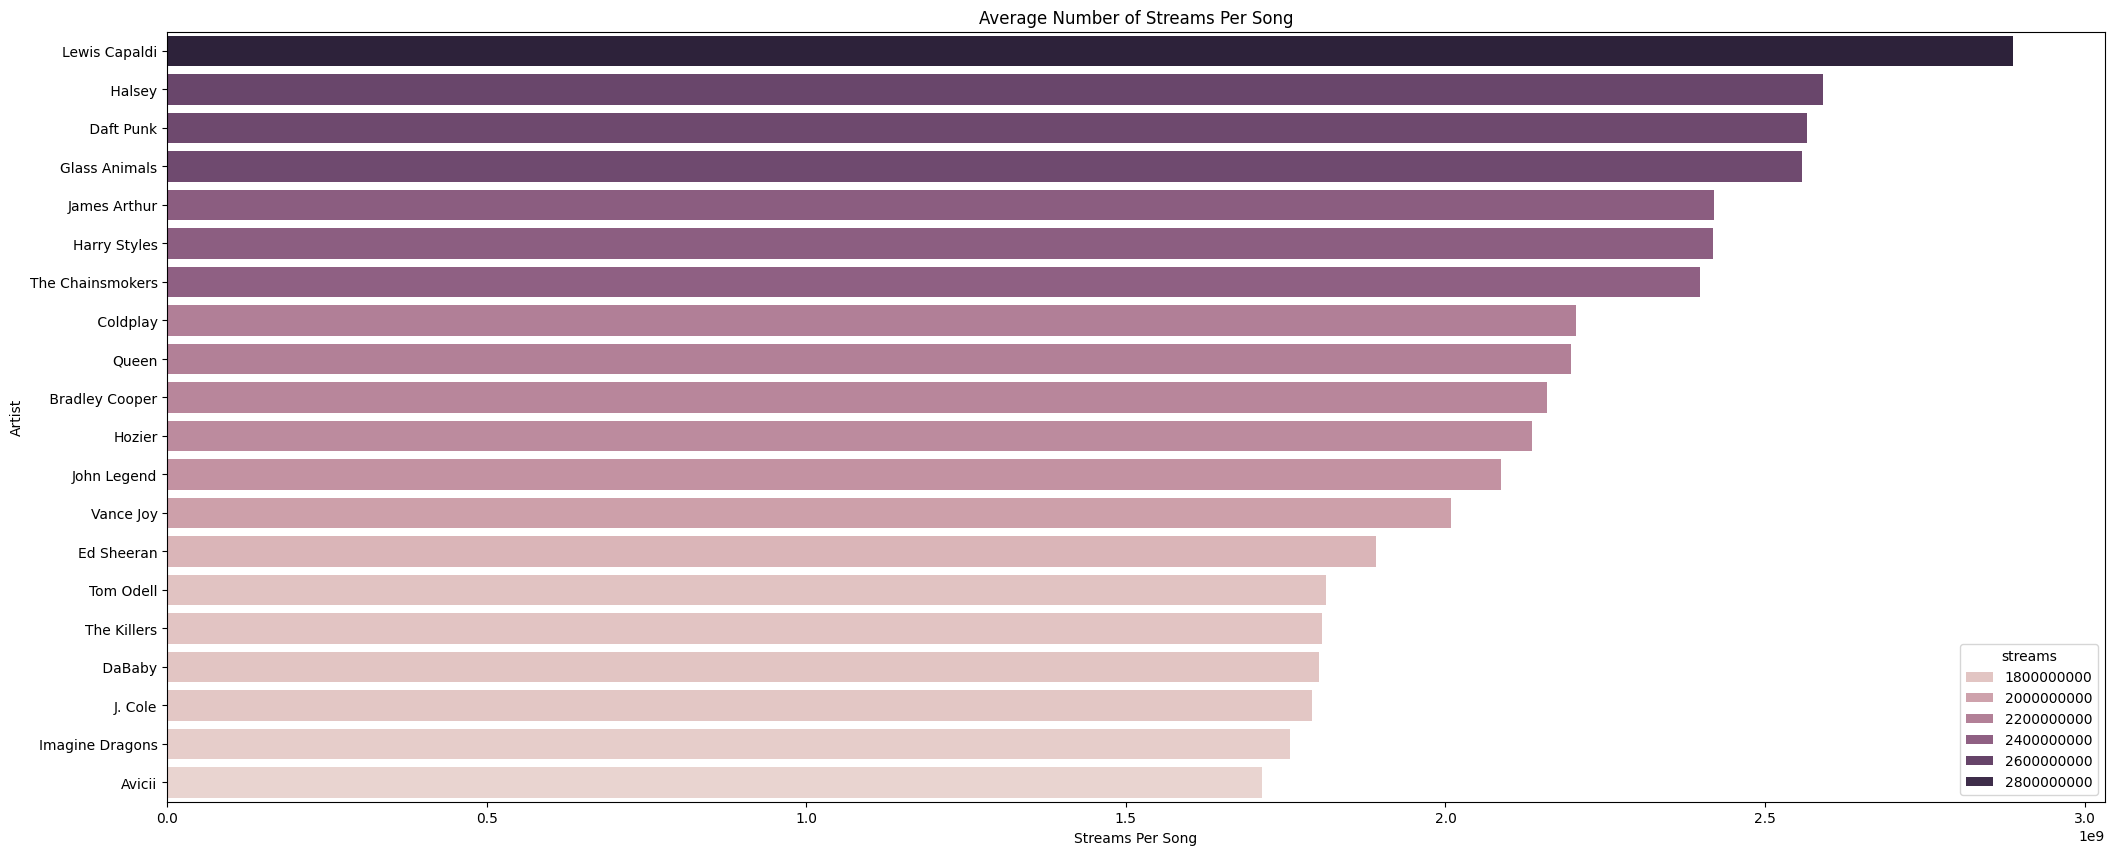

In [119]:
top_20_streams = avg_streams_per_artist.head(20)
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(data=top_20_streams, x='streams', y='artist', hue='streams', orient='h')
plt.ylabel('Artist')
plt.xlabel('Streams Per Song')
plt.title('Average Number of Streams Per Song')
plt.show()

In [110]:
genre_streams = spotifyCombined.groupby('track_genre')['streams'].sum()
genre_streams = pd.DataFrame(genre_streams).sort_values('streams', ascending=False)
genre_streams.head()

streams
track_genre              
pop          6.695349e+10
dance        3.811786e+10
hip-hop      2.147930e+10
rock         9.234945e+09
latin        9.077794e+09

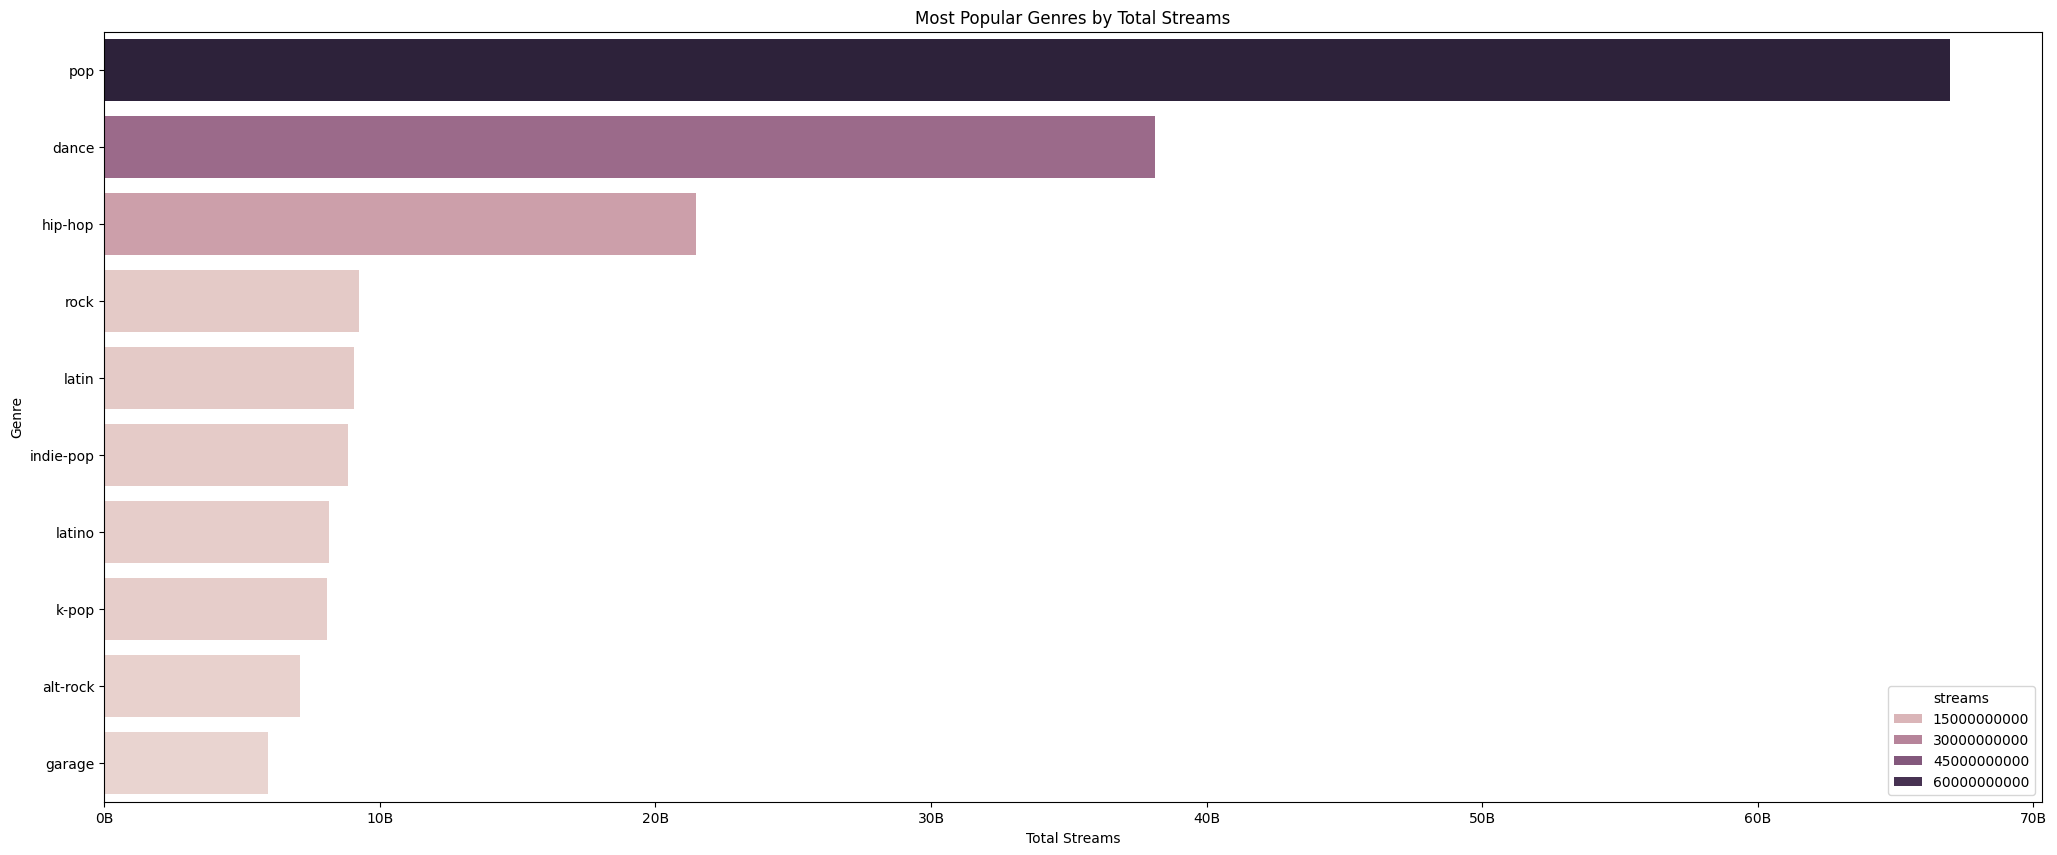

In [130]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(data=genre_streams.head(10), y='track_genre', x='streams', hue='streams', orient='h')
plt.xlabel('Total Streams')
plt.ylabel('Genre')
plt.title('Most Popular Genres by Total Streams')
plt.gca().xaxis.set_major_formatter(billions_formatter)
plt.show()

#### Month Realeased Streams

Total Streams


streams
released_month              
1               9.675832e+10
5               5.320564e+10
11              4.420738e+10
10              4.298988e+10
9               4.114008e+10

Average Streams


streams
released_month              
9               7.346444e+08
1               7.275061e+08
8               6.312657e+08
10              5.889024e+08
11              5.525923e+08

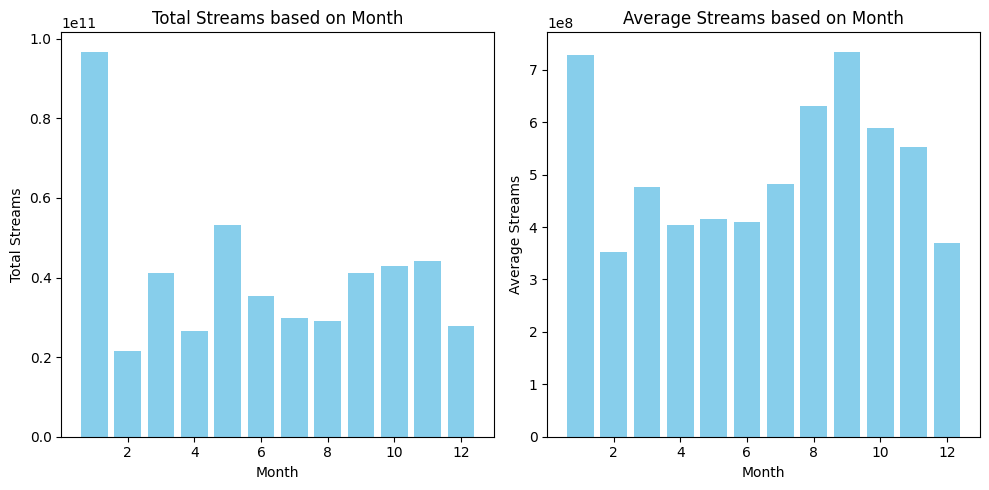

In [78]:
#Total streams based on danceability
monthlyStreams = pd.pivot_table(spotifyDF, values='streams', index='released_month', aggfunc='sum')
print('Total Streams')
display(monthlyStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on danceability
monthlyStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='released_month', aggfunc='mean')
print('Average Streams')
display(monthlyStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Month
axs[0].bar(monthlyStreams.index, monthlyStreams['streams'], color='skyblue')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Month')
#Average streams vs. Month
axs[1].bar(monthlyStreamAvg.index, monthlyStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Month')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

#### BPM and Streams

Total Streams


streams
bpm              
120  1.789501e+10
110  1.389453e+10
95   1.368051e+10
124  1.202015e+10
92   1.173570e+10

Average Streams


streams
bpm              
171  2.409867e+09
179  1.735442e+09
186  1.718833e+09
181  1.256881e+09
111  1.230280e+09

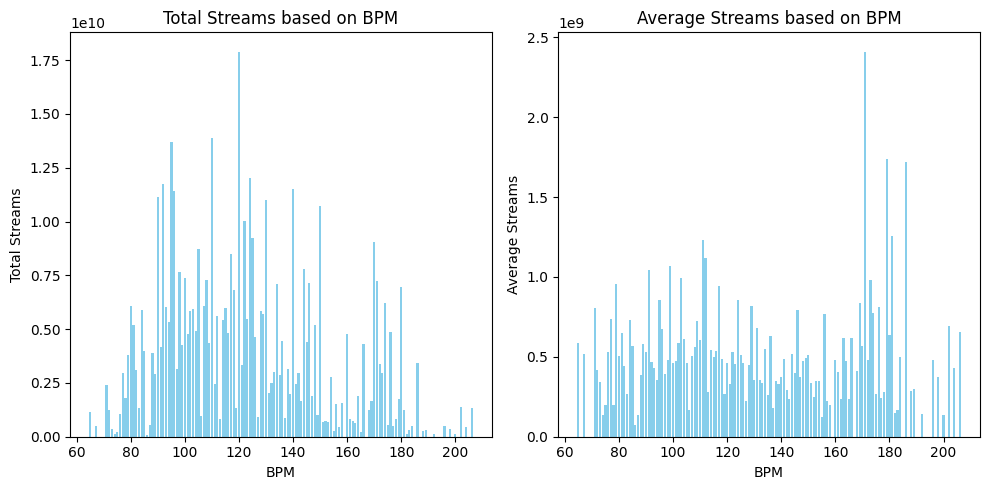

In [79]:
#Total streams based on BPM
bpmStreams = pd.pivot_table(spotifyDF, values='streams', index='bpm', aggfunc='sum')
print('Total Streams')
display(bpmStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on BPM
bpmStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='bpm', aggfunc='mean')
print('Average Streams')
display(bpmStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. BPM
axs[0].bar(bpmStreams.index, bpmStreams['streams'], color='skyblue')
axs[0].set_xlabel('BPM')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on BPM')
#Average streams vs. BPM
axs[1].bar(bpmStreamAvg.index, bpmStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('BPM')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on BPM')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

#### Key and Streams

Total Streams


streams
key              
C#   7.251363e+10
G    4.344954e+10
G#   4.339898e+10
D    4.289157e+10
B    4.206718e+10

Average Streams


streams
key              
C#   6.042802e+08
E    5.774972e+08
D#   5.530365e+08
A#   5.524754e+08
D    5.295256e+08

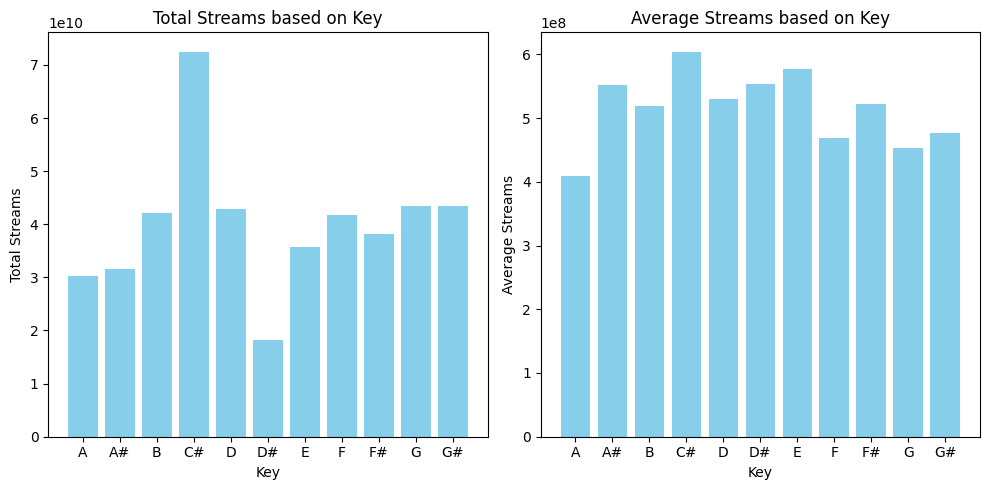

In [80]:
#Total streams based on Key
keyStreams = pd.pivot_table(spotifyDF, values='streams', index='key', aggfunc='sum')
print('Total Streams')
display(keyStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Key
keyStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='key', aggfunc='mean')
print('Average Streams')
display(keyStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Key
axs[0].bar(keyStreams.index, keyStreams['streams'], color='skyblue')
axs[0].set_xlabel('Key')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Key')
#Average streams vs. Key
axs[1].bar(keyStreamAvg.index, keyStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Key')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Key')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

#### Danceability Vs. Streams

Total Streams


streams
danceability_%              
70              2.133062e+10
61              1.844879e+10
77              1.658312e+10
59              1.573039e+10
74              1.536490e+10

Average Streams


streams
danceability_%              
35              1.258126e+09
29              1.230856e+09
55              1.003559e+09
32              9.952062e+08
45              9.749488e+08

KeyboardInterrupt: 

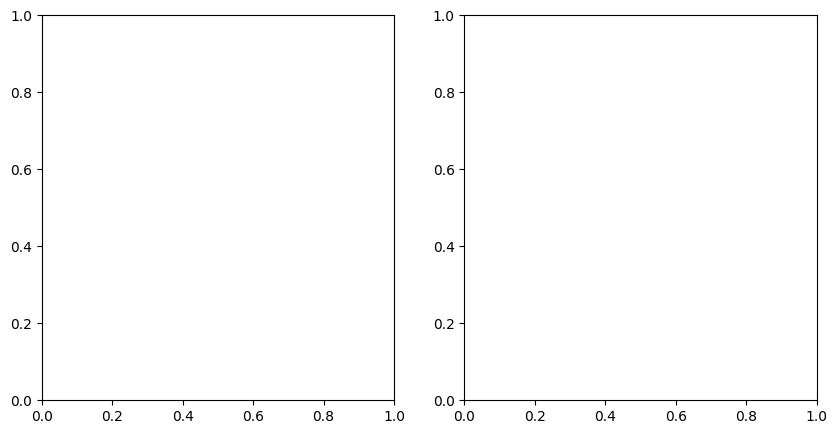

In [81]:
#Total streams based on danceability
danceStreams = pd.pivot_table(spotifyDF, values='streams', index='danceability_%', aggfunc='sum')
print('Total Streams')
display(danceStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on danceability
danceStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='danceability_%', aggfunc='mean')
print('Average Streams')
display(danceStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. danceability
axs[0].bar(danceStreams.index, danceStreams['streams'], color='skyblue')
axs[0].set_xlabel('Danceability [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Danceability')
#Average streams vs. danceability
axs[1].bar(danceStreamAvg.index, danceStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Danceability [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Danceabilty')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()


#### Streams based on Valence %

Total Streams


streams
valence_%              
53         1.335094e+10
24         1.301216e+10
59         1.242249e+10
40         1.029115e+10
42         1.017591e+10

Average Streams


streams
valence_%              
12         1.239393e+09
93         1.141778e+09
95         1.113839e+09
38         1.005746e+09
6          9.772233e+08

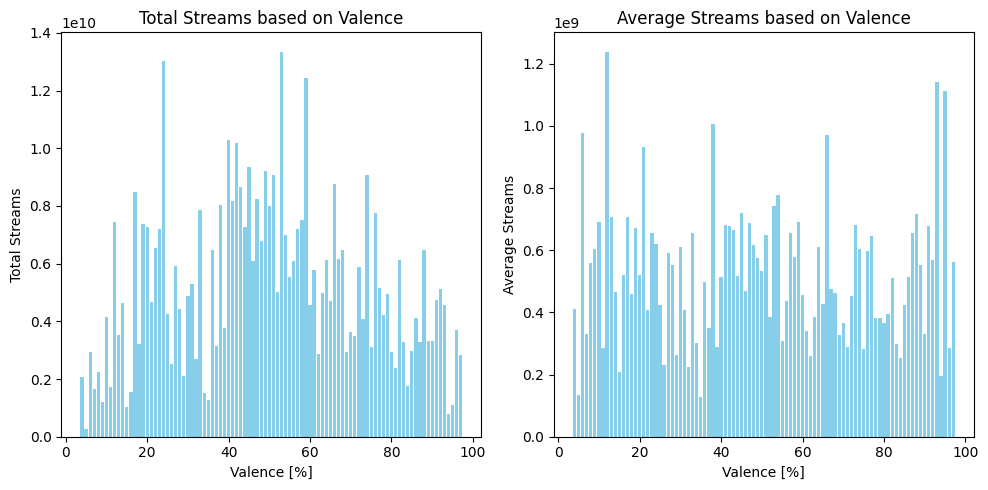

In [ ]:
#Total streams based on Valence
valenceStreams = pd.pivot_table(spotifyDF, values='streams', index='valence_%', aggfunc='sum')
print('Total Streams')
display(valenceStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Valence
valenceStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='valence_%', aggfunc='mean')
print('Average Streams')
display(valenceStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Valence
axs[0].bar(valenceStreams.index, valenceStreams['streams'], color='skyblue')
axs[0].set_xlabel('Valence [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Valence')
#Average streams vs. Valence
axs[1].bar(valenceStreamAvg.index, valenceStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Valence [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Valence')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()


#### Streams based on Energy

Total Streams


streams
energy_%              
52        1.631815e+10
66        1.624626e+10
80        1.542621e+10
73        1.363552e+10
65        1.321418e+10

Average Streams


streams
energy_%              
93        1.305763e+09
27        1.102825e+09
26        1.098487e+09
52        9.065641e+08
38        8.869762e+08

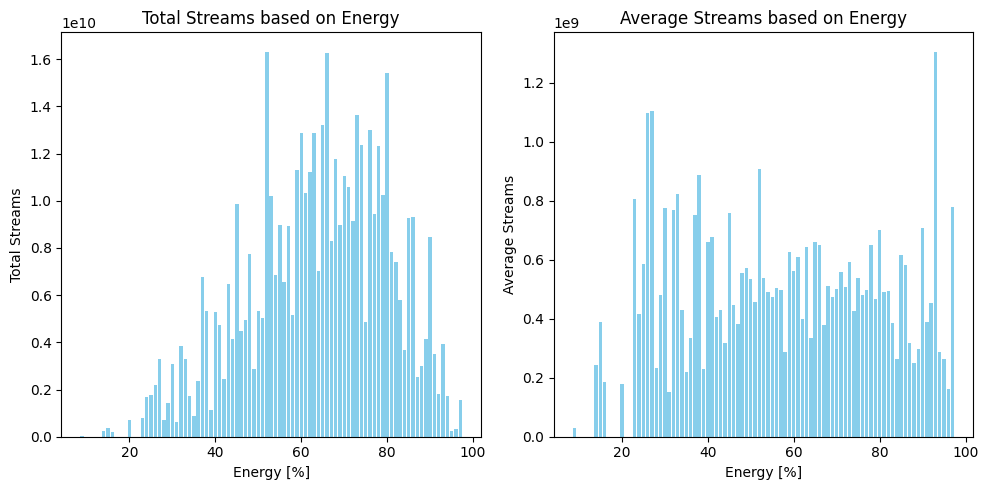

In [ ]:
#Total streams based on Energy
energyStreams = pd.pivot_table(spotifyDF, values='streams', index='energy_%', aggfunc='sum')
print('Total Streams')
display(energyStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Energy
energyStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='energy_%', aggfunc='mean')
print('Average Streams')
display(energyStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Energy
axs[0].bar(energyStreams.index, energyStreams['streams'], color='skyblue')
axs[0].set_xlabel('Energy [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Energy')
#Average streams vs. Energy
axs[1].bar(energyStreamAvg.index, energyStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Energy [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Energy')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()


#### Streams Based on Accousticness

Total Streams


streams
acousticness_%              
0               3.525733e+10
1               3.004232e+10
4               2.208287e+10
2               2.119280e+10
9               1.924348e+10

Average Streams


streams
acousticness_%              
58              1.662174e+09
63              1.521946e+09
54              1.431395e+09
93              1.240064e+09
68              1.230856e+09

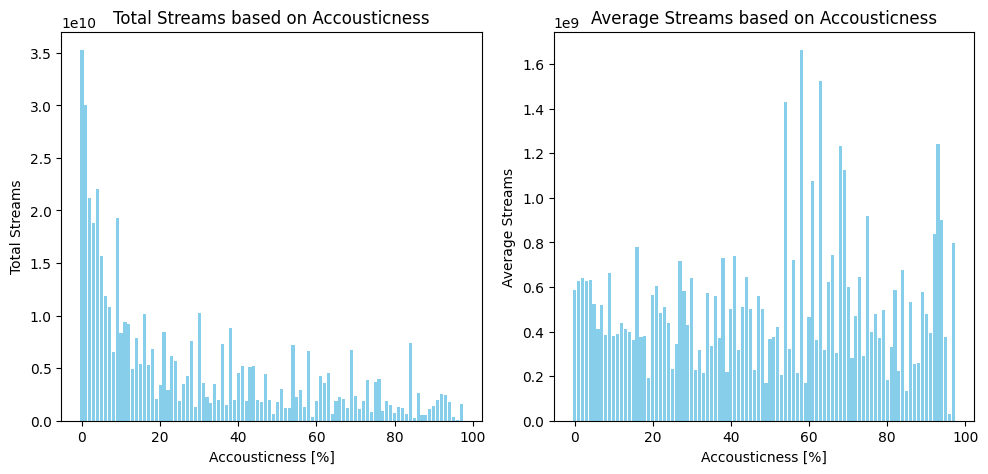

In [ ]:
#Total streams based on Accousticness
accStreams = pd.pivot_table(spotifyDF, values='streams', index='acousticness_%', aggfunc='sum')
print('Total Streams')
display(accStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Accousticness
accStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='acousticness_%', aggfunc='mean')
print('Average Streams')
display(accStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Accousticness
axs[0].bar(accStreams.index, accStreams['streams'], color='skyblue')
axs[0].set_xlabel('Accousticness [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Accousticness')
#Average streams vs. Accousticness
axs[1].bar(accStreamAvg.index, accStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Accousticness [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Accousticness')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

#### Streams based on liveness

Total Streams


streams
liveness_%              
9           5.752475e+10
11          4.736157e+10
10          4.472486e+10
12          2.988619e+10
8           2.791170e+10

Average Streams


streams
liveness_%              
64          1.385757e+09
42          9.638291e+08
46          8.710787e+08
50          8.437020e+08
45          7.814507e+08

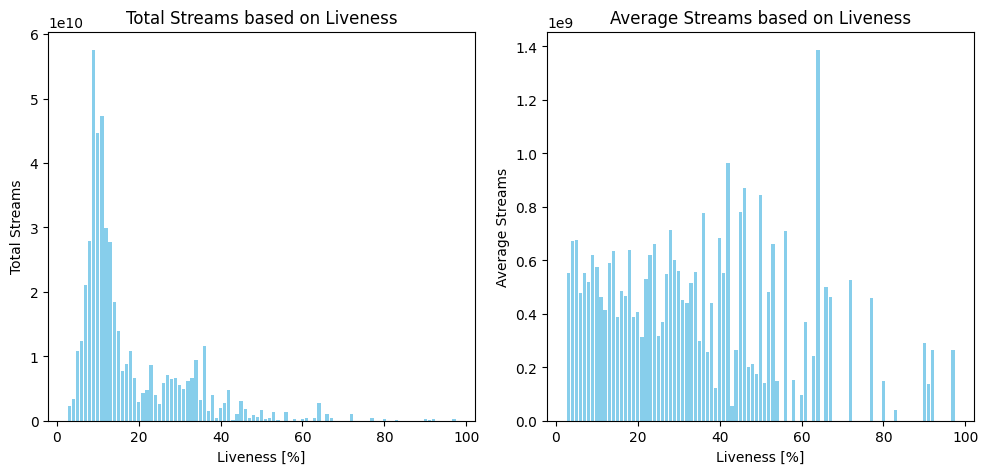

In [ ]:
#Total streams based on liveness
livenessStreams = pd.pivot_table(spotifyDF, values='streams', index='liveness_%', aggfunc='sum')
print('Total Streams')
display(livenessStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on liveness
livenessStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='liveness_%', aggfunc='mean')
print('Average Streams')
display(livenessStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. liveness
axs[0].bar(livenessStreams.index, livenessStreams['streams'], color='skyblue')
axs[0].set_xlabel('Liveness [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Liveness')
#Average streams vs. liveness
axs[1].bar(livenessStreamAvg.index, livenessStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Liveness [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Liveness')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

#### Streams based on Speachiness

Total Streams


streams
speechiness_%              
3              9.269137e+10
4              8.691274e+10
5              7.503727e+10
6              3.727406e+10
8              2.815813e+10

Average Streams


streams
speechiness_%              
2              1.468183e+09
44             1.155506e+09
18             8.654915e+08
37             7.983765e+08
28             7.914525e+08

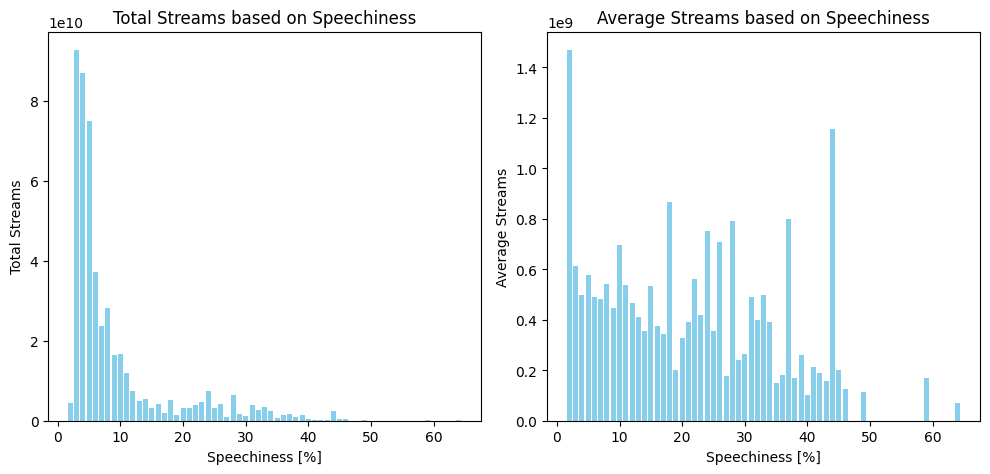

In [ ]:
#Total streams based on speechiness
speechStreams = pd.pivot_table(spotifyDF, values='streams', index='speechiness_%', aggfunc='sum')
print('Total Streams')
display(speechStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on speechiness
speechStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='speechiness_%', aggfunc='mean')
print('Average Streams')
display(speechStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. speechiness
axs[0].bar(speechStreams.index, speechStreams['streams'], color='skyblue')
axs[0].set_xlabel('Speechiness [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Speechiness')
#Average streams vs. speechiness
axs[1].bar(speechStreamAvg.index, speechStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Speechiness [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Speechiness')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

### Analysis of Data: Correlation

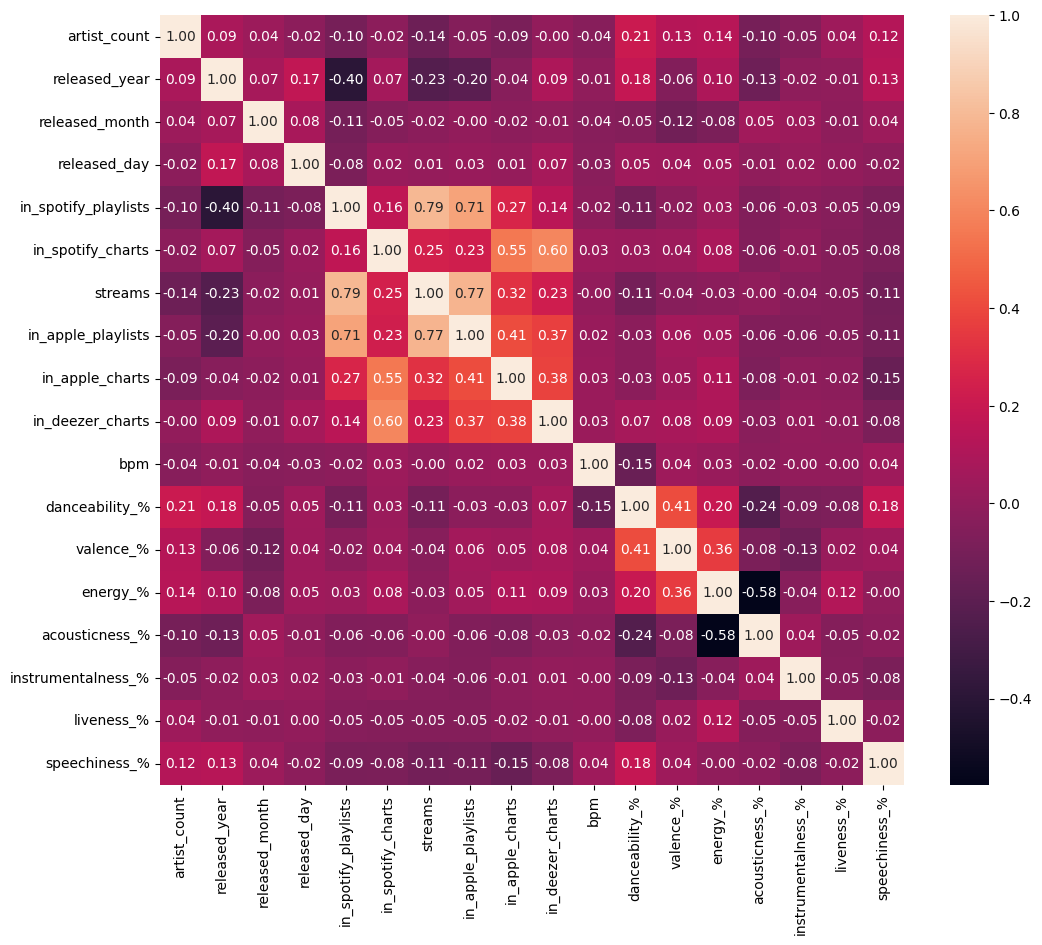

In [ ]:
#Create new df for only number columns
numeric_columns = spotifyDF.select_dtypes(include='number').columns
#Create a new DataFrame with only numeric columns
spotifyNumericDF = spotifyDF[numeric_columns]

# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(spotifyNumericDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

### Analysis of Data: Linearity

KeyboardInterrupt: 

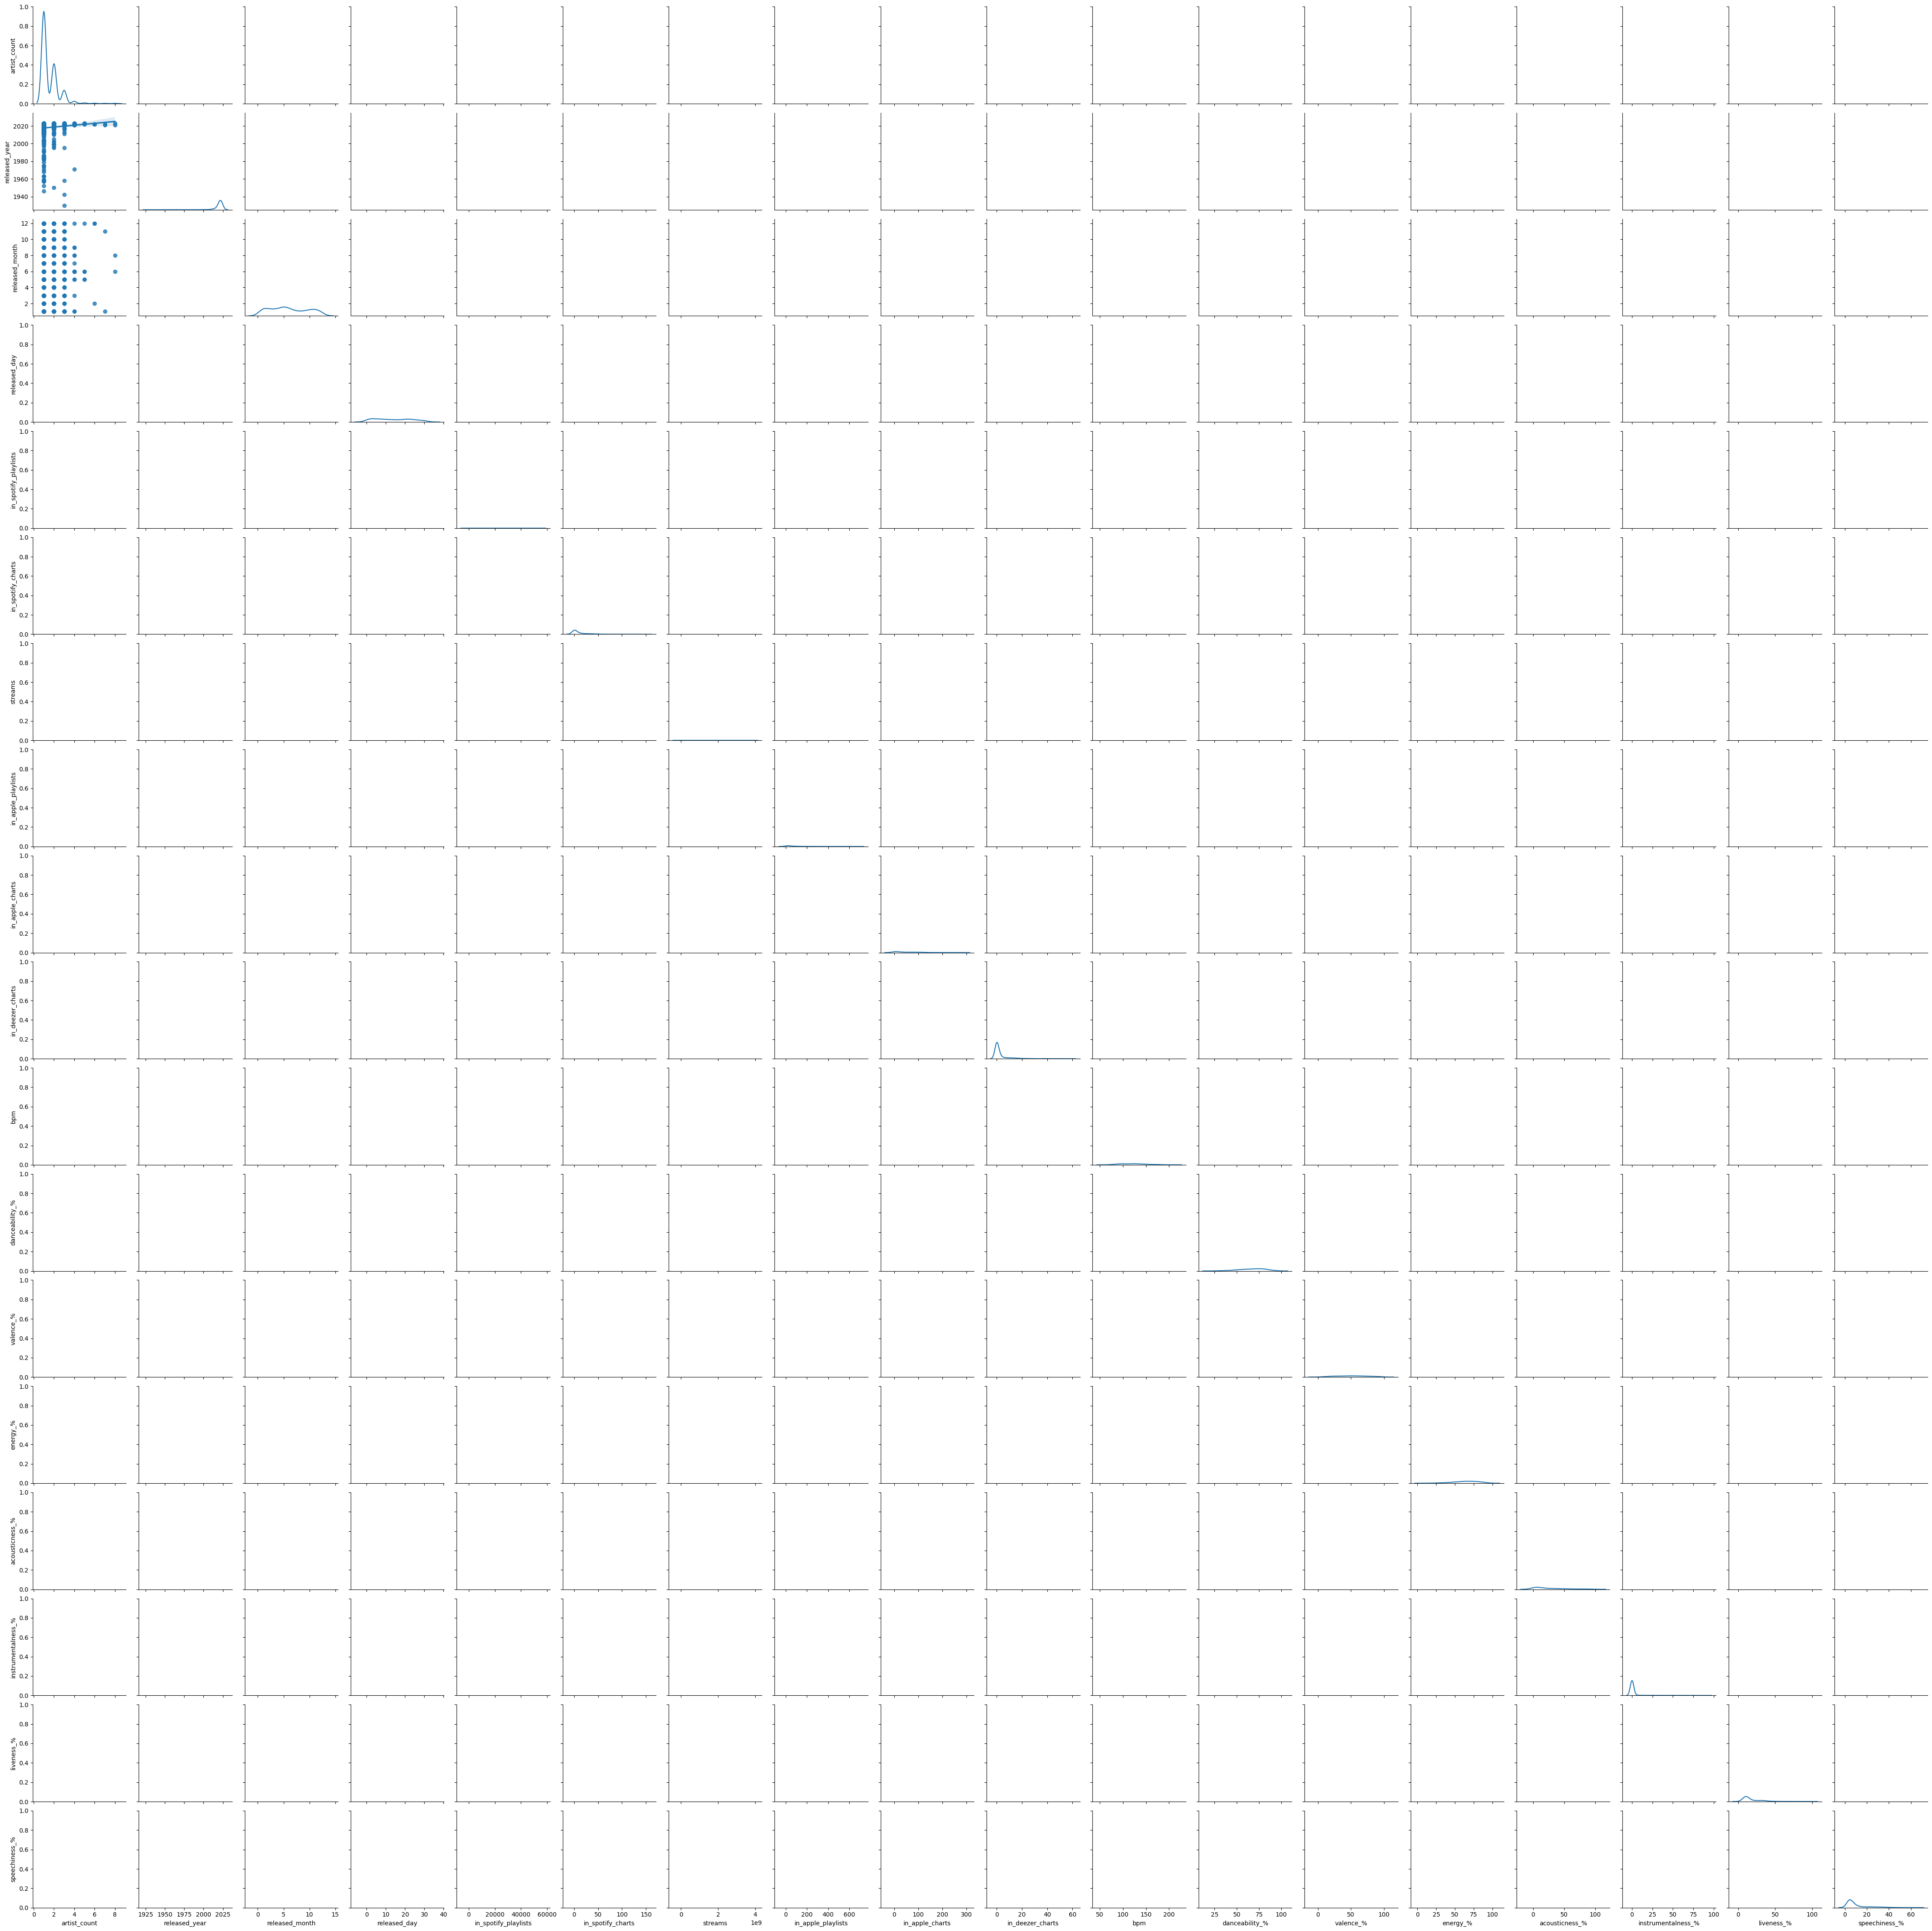

In [ ]:
g = sns.PairGrid(spotifyNumericDF)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.regplot)

### Analysis of Data: Regression Tree

In [ ]:
label_encoder = LabelEncoder()
spotifyDF['key_encoded'] = label_encoder.fit_transform(spotifyDF['key'])
# Split the data into training and testing sets
spotifyDFRegression = spotifyDF.select_dtypes(include=['int', 'float'])
display(spotifyDFRegression)


artist_count  released_year  released_month  released_day  \
0               2           2023               7            14   
1               1           2023               3            23   
2               1           2023               6            30   
3               1           2019               8            23   
4               1           2023               5            18   
..            ...            ...             ...           ...   
947             1           2022              11             3   
948             1           2022              10            21   
949             2           2022              11             3   
950             3           2022              10            20   
951             1           2022              11             4   

     in_spotify_playlists  in_spotify_charts      streams  in_apple_playlists  \
0                     553                147  141381703.0                  43   
1                    1474                 48  133716286.0                  48   
2                    1397                113  140003974.0                  94   
3                    7858                100  800840817.0                 116   
4                    3133                 50  303236322.0                  84   
..                    ...                ...          ...                 ...   
947                   953                  0   91473363.0                  61   
948                  1180                  0  121871870.0                   4   
949                   573                  0   73513683.0                   2   
950                  1320                  0  133895612.0                  29   
951                   782                  2   96007391.0                  27   

     in_apple_charts  in_deezer_charts  bpm  danceability_%  valence_%  \
0                263                10  125              80         89   
1                126                14   92              71         61   
2                207                14  138              51         32   
3                207                12  170              55         58   
4                133                15  144              65         23   
..               ...               ...  ...             ...        ...   
947               13                 1  144              60         24   
948                0                 0  166              42          7   
949                0                 0   92              80         81   
950               26                 0   97              82         67   
951               18                 1   90              61         32   

     energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%  \
0          83              31                   0           8              4   
1          74               7                   0          10              4   
2          53              17                   0          31              6   
3          72              11                   0          11             15   
4          80              14                  63          11              6   
..        ...             ...                 ...         ...            ...   
947        39              57                   0           8              3   
948        24              83                   1          12              6   
949        67               4                   0           8              6   
950        77               8                   0          12              5   
951        67              15                   0          11              5   

     key_encoded  
0              2  
1              3  
2              7  
3              0  
4              0  
..           ...  
947            0  
948            8  
949            3  
950            3  
951            6  

[952 rows x 19 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(spotifyDFRegression.drop('streams', axis=1), spotifyDFRegression['streams'], test_size=0.2, random_state=42)

# Create and fit the Lasso regression model
lasso = Lasso(alpha=0.1)  # Set the alpha parameter for regularization
lasso.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lasso.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Print the coefficients of the model
print("Coefficients:", lasso.coef_)

Root Mean Squared Error: 275261257.6798485
Coefficients: [-34486268.09528667   3266987.6862029    2056075.57155622
   1926981.82592215     37238.40391266   3968241.97581309
   2837153.59224907   -563707.01380228  -6901920.32457596
    -83317.46477277   -245679.06492772   -161977.90950343
  -1210549.96476002    848706.78697558   -151239.72566775
    -99301.21792443  -1344827.77783001  -2503213.39950711]


In [ ]:
# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': spotifyDFRegression.drop('streams', axis=1).columns, 'Coefficient': lasso.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[coeffDF['Coefficient'] < 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
spotifyLassoRegDF = spotifyDFRegression[negFeat + ['streams']]

# Print the new DataFrame
display(spotifyLassoRegDF)

                 Feature   Coefficient
0           artist_count -3.448627e+07
1          released_year  3.266988e+06
2         released_month  2.056076e+06
3           released_day  1.926982e+06
4   in_spotify_playlists  3.723840e+04
5      in_spotify_charts  3.968242e+06
6     in_apple_playlists  2.837154e+06
7        in_apple_charts -5.637070e+05
8       in_deezer_charts -6.901920e+06
9                    bpm -8.331746e+04
10        danceability_% -2.456791e+05
11             valence_% -1.619779e+05
12              energy_% -1.210550e+06
13        acousticness_%  8.487068e+05
14    instrumentalness_% -1.512397e+05
15            liveness_% -9.930122e+04
16         speechiness_% -1.344828e+06
17           key_encoded -2.503213e+06


artist_count  in_apple_charts  in_deezer_charts  bpm  danceability_%  \
0               2              263                10  125              80   
1               1              126                14   92              71   
2               1              207                14  138              51   
3               1              207                12  170              55   
4               1              133                15  144              65   
..            ...              ...               ...  ...             ...   
947             1               13                 1  144              60   
948             1                0                 0  166              42   
949             2                0                 0   92              80   
950             3               26                 0   97              82   
951             1               18                 1   90              61   

     valence_%  energy_%  instrumentalness_%  liveness_%  speechiness_%  \
0           89        83                   0           8              4   
1           61        74                   0          10              4   
2           32        53                   0          31              6   
3           58        72                   0          11             15   
4           23        80                  63          11              6   
..         ...       ...                 ...         ...            ...   
947         24        39                   0           8              3   
948          7        24                   1          12              6   
949         81        67                   0           8              6   
950         67        77                   0          12              5   
951         32        67                   0          11              5   

     key_encoded      streams  
0              2  141381703.0  
1              3  133716286.0  
2              7  140003974.0  
3              0  800840817.0  
4              0  303236322.0  
..           ...          ...  
947            0   91473363.0  
948            8  121871870.0  
949            3   73513683.0  
950            3  133895612.0  
951            6   96007391.0  

[952 rows x 12 columns]

In [ ]:
# Extract features (X) and target values (y) from the dataframe
X =  spotifyLassoRegDF.drop('streams', axis=1)
print(X)
y = spotifyLassoRegDF['streams']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor
tree_regressor = DecisionTreeRegressor()

# Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) as the evaluation metric
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

     artist_count  in_apple_charts  in_deezer_charts  bpm  danceability_%  \
0               2              263                10  125              80   
1               1              126                14   92              71   
2               1              207                14  138              51   
3               1              207                12  170              55   
4               1              133                15  144              65   
..            ...              ...               ...  ...             ...   
947             1               13                 1  144              60   
948             1                0                 0  166              42   
949             2                0                 0   92              80   
950             3               26                 0   97              82   
951             1               18                 1   90              61   

     valence_%  energy_%  instrumentalness_%  liveness_%  speechiness_%  \


In [ ]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_regressor, feature_names=X.columns, filled=True, rounded=True)
plt.show()

KeyboardInterrupt: 

In [ ]:
#What if we only took ut chart performance
X =  spotifyLassoRegDF.drop(['streams', 'in_apple_charts', 'in_deezer_charts'], axis=1)
print(X)
y = spotifyLassoRegDF['streams']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor
tree_regressor = DecisionTreeRegressor()

# Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) as the evaluation metric
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

     artist_count  bpm  danceability_%  valence_%  energy_%  \
0               2  125              80         89        83   
1               1   92              71         61        74   
2               1  138              51         32        53   
3               1  170              55         58        72   
4               1  144              65         23        80   
..            ...  ...             ...        ...       ...   
947             1  144              60         24        39   
948             1  166              42          7        24   
949             2   92              80         81        67   
950             3   97              82         67        77   
951             1   90              61         32        67   

     instrumentalness_%  liveness_%  speechiness_%  key_encoded  
0                     0           8              4            2  
1                     0          10              4            3  
2                     0          31          

## Combined Spotify Dataset

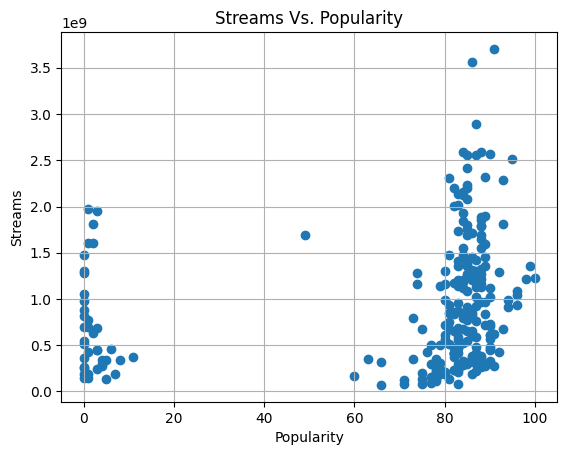

In [ ]:
# Plotting
plt.scatter(spotifyCombined['popularity'], spotifyCombined['streams'], marker='o')

# Adding labels and title
plt.xlabel('Popularity')
plt.ylabel('Streams')
plt.title('Streams Vs. Popularity')

# Display the plot
plt.grid(True)
plt.show()

In [ ]:
corrCoef = np.corrcoef(popularDF['popularity'], popularDF['streams'])[0, 1]
print(corrCoef)

0.3558464953631708


(213, 27)


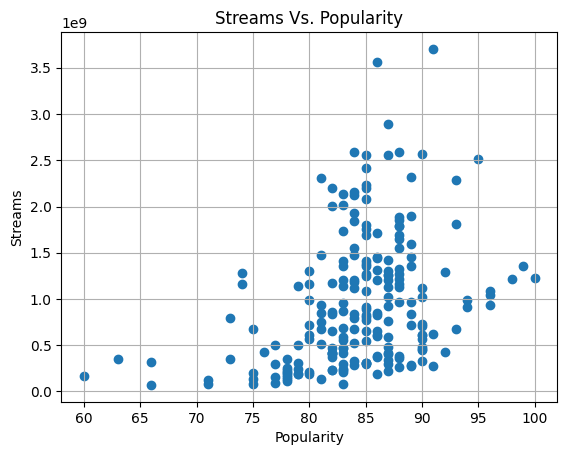

In [ ]:
# Plotting
popularDF = spotifyCombined[spotifyCombined['popularity'] > 50]
print(popularDF.shape)
plt.scatter(popularDF['popularity'], popularDF['streams'], marker='o')

# Adding labels and title
plt.xlabel('Popularity')
plt.ylabel('Streams')
plt.title('Streams Vs. Popularity')

# Display the plot
plt.grid(True)
plt.show()

#### Check non-linear

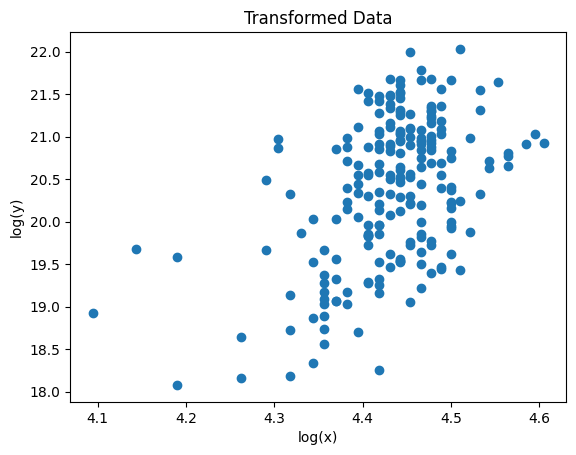

Correlation Coefficient: 0.4744610005717168
Curve Fitting Parameters: [-4.40275921e-21  9.99999993e-01]


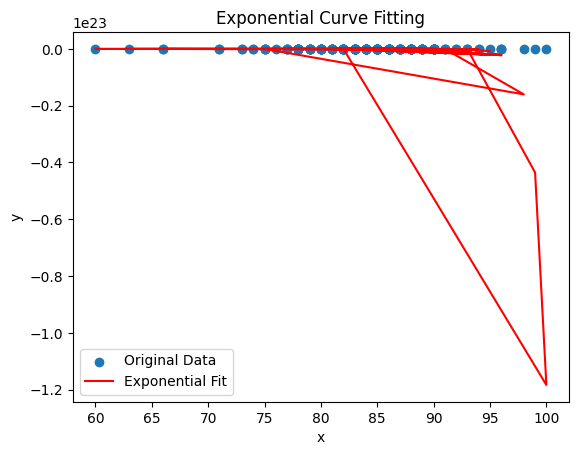

In [ ]:
x = spotifyCombined.loc[spotifyCombined['popularity'] > 50, 'popularity']
y = spotifyCombined.loc[spotifyCombined['popularity'] > 50, 'streams']
# 2. Transform the Data
x_log = np.log(x)
y_log = np.log(y)
plt.scatter(x_log, y_log)
plt.xlabel('log(x)')
plt.ylabel('log(y)')
plt.title('Transformed Data')
plt.show()

# 3. Correlation Analysis
correlation_coefficient, _ = pearsonr(x_log, y_log)
print("Correlation Coefficient:", correlation_coefficient)

# 4. Curve Fitting
def exponential_func(x, a, b):
    return a * np.exp(b * x)

params, _ = curve_fit(exponential_func, x, y)
print("Curve Fitting Parameters:", params)

# Plot the curve fitting
plt.scatter(x, y, label='Original Data')
plt.plot(x, exponential_func(x, *params), color='red', label='Exponential Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponential Curve Fitting')
plt.legend()
plt.show()

In [ ]:
#Set columns
cols = ['released_year', 'released_month', 'released_day', 'popularity', 'streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'Encoded_key']

### Pop Genre

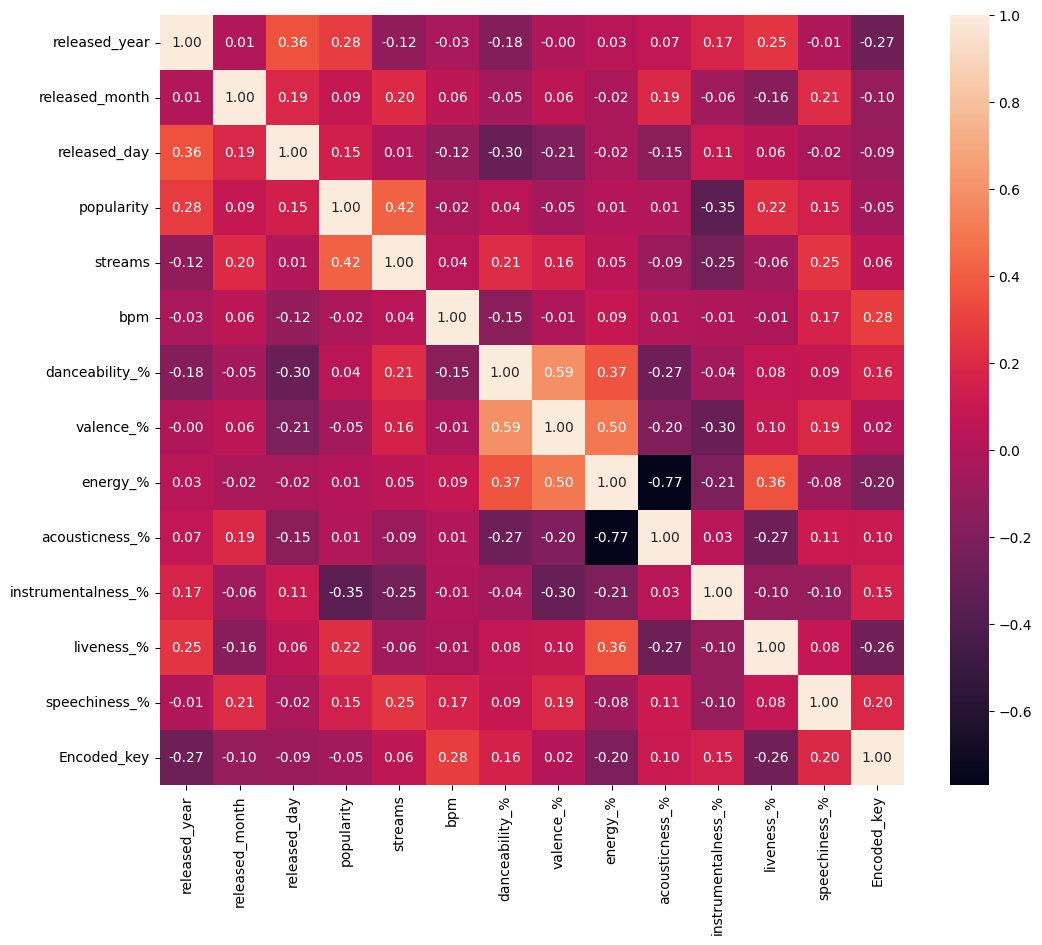

In [ ]:
#Create df based only on pop genre
popDF = spotifyCombined[spotifyCombined['track_genre'].isin(['pop'])]
popDF = popDF[cols]

# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(popDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(popDF.drop('streams', axis=1), popDF['streams'], test_size=0.2, random_state=42)

# Create and fit the Lasso regression model
lasso = Lasso(alpha=0.1)  # Set the alpha parameter for regularization
lasso.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lasso.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Print the coefficients of the model
print("Coefficients:", lasso.coef_)

Root Mean Squared Error: 1041543866.2184367
Coefficients: [-7.18139343e+07  1.48931007e+07  1.23995434e+07  9.71741872e+06
  4.63045247e+05  9.57400843e+05  1.62323711e+07 -1.10204218e+07
  1.20238996e+05  7.64626045e+08 -8.91000322e+05  1.14167294e+07
 -5.95298709e+07]


In [ ]:
# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': popDF.drop('streams', axis=1).columns, 'Coefficient': lasso.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[coeffDF['Coefficient'] < 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
popLassoRegDF = popDF[negFeat + ['streams']]

# Print the new DataFrame
display(popLassoRegDF)

               Feature   Coefficient
0        released_year -7.181393e+07
1       released_month  1.489310e+07
2         released_day  1.239954e+07
3           popularity  9.717419e+06
4                  bpm  4.630452e+05
5       danceability_%  9.574008e+05
6            valence_%  1.623237e+07
7             energy_% -1.102042e+07
8       acousticness_%  1.202390e+05
9   instrumentalness_%  7.646260e+08
10          liveness_% -8.910003e+05
11       speechiness_%  1.141673e+07
12         Encoded_key -5.952987e+07


released_year  energy_%  liveness_%  Encoded_key       streams
0              2022        73          31            9  2.513188e+09
5              2014        68          13            8  1.355959e+09
20             2016        52          15            4  1.647990e+09
21             2016        59          13           10  2.565530e+09
27             2019        80           9            4  3.703895e+09
36             2020        58          27            3  8.120196e+08
93             2018        41          11            4  2.887242e+09
97             2011        66          12            4  9.836375e+08
98             2012        55          15           10  8.828312e+08
100            2017        69           9            4  1.116996e+09
113            2020        61           9            8  6.071238e+08
114            2019        82          34            3  2.322580e+09
118            2017        45          11           11  2.559529e+09
161            2021        74          40            5  1.167331e+09
171            2020        82          50            3  1.591224e+09
189            2017        65           9            4  3.562544e+09
190            2014        52          12           11  1.131091e+09
250            2021        51          18            1  7.264344e+08
272            2022        32          14           11  9.885157e+08
273            2021        86           4            5  1.302184e+09
276            2018        74          17            1  7.054698e+08
280            2018        60          33            4  1.449799e+09
306            2016        56           9            1  2.420461e+09
307            2015        57          14            3  1.947372e+09
321            2020        57          12            8  6.980861e+08
354            2022        25          14            7  3.385650e+08
363            2020        43          32            8  1.301800e+09
394            2020        90          36            2  1.555511e+09
436            2012        74          29            7  1.479264e+09
524            2011        54           9            9  6.291731e+08
562            2017        94          10            3  1.357235e+08
569            2022        74          32            3  3.396598e+08
579            2017        67          30            2  8.880470e+08
589            2021        66          11            9  1.887040e+09
595            2021        24          14            3  1.056760e+09
597            2021        43          10            1  1.858144e+09
618            2021        68          42            3  1.445942e+09
634            2021        60          42            0  1.256881e+09
656            2021        45           8            9  8.506084e+08
685            2020        37           9            7  1.180095e+09
702            2019        33          14            0  9.913361e+08
741            2019        32           8            2  1.759568e+09
933            2014        38          10            7  2.236668e+09
934            2015        38          28            7  2.123310e+09
988            2022        54          14            1  3.821996e+08
1222           2002        44          11            8  1.608164e+09

Root Mean Squared Error: 1210427024.241923


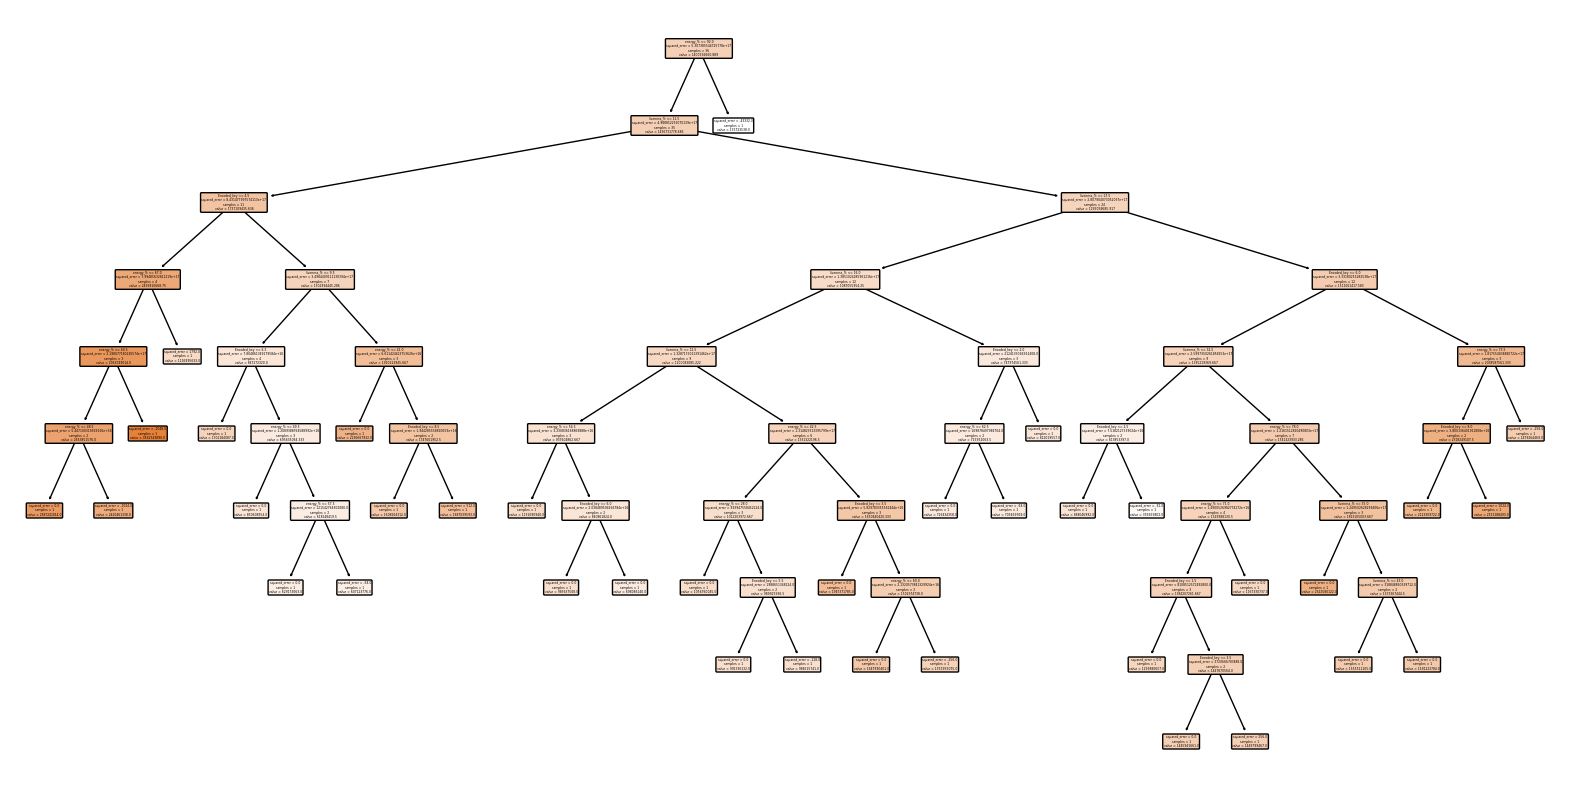

In [ ]:
#Extract features (X) and target values (y) from the dataframe
X =  popLassoRegDF.drop(['streams', 'released_year'], axis=1)
y = popLassoRegDF['streams']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create a decision tree regressor
tree_regressor = DecisionTreeRegressor()

#Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) as the evaluation metric
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_regressor, feature_names=X.columns, filled=True, rounded=True)
plt.show()

### Dance Genre

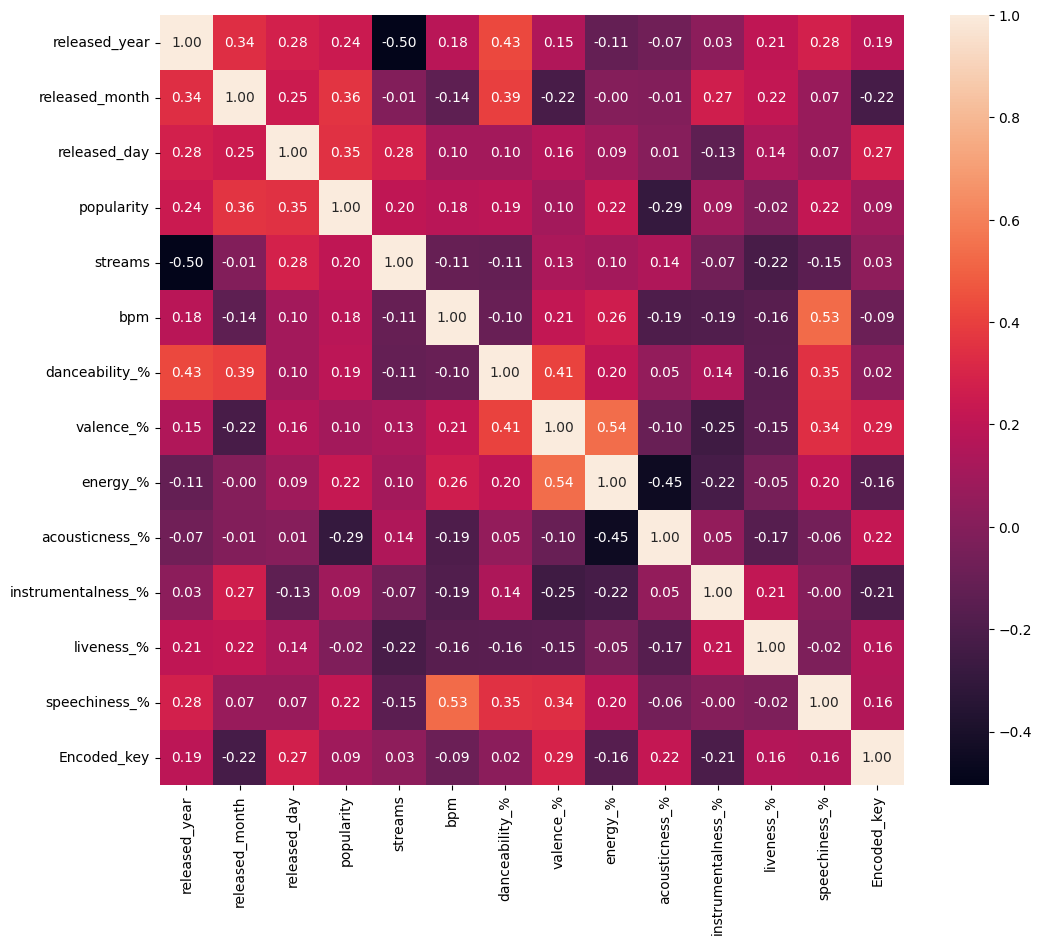

In [ ]:
#Create df based only on Dance genre
danceDF = spotifyCombined[spotifyCombined['track_genre'].isin(['dance'])]

#Create a new DataFrame with only numeric columns
danceDF = danceDF[cols]

# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(danceDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(danceDF.drop('streams', axis=1), danceDF['streams'], test_size=0.2, random_state=42)

# Create and fit the Lasso regression model
lasso = Lasso(alpha=0.1)  # Set the alpha parameter for regularization
lasso.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lasso.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Print the coefficients of the model
print("Coefficients:", lasso.coef_)

Root Mean Squared Error: 786472345.2768075
Coefficients: [-1.46703356e+08  5.31743909e+07  1.80158398e+07  7.70402100e+06
  2.86038575e+06  5.13928683e+06  1.22354000e+07 -1.02387153e+07
  6.74977957e+06 -8.02488458e+06 -4.88154064e+06 -2.63043493e+07
 -8.11889332e+05]


In [ ]:
# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': danceDF.drop('streams', axis=1).columns, 'Coefficient': lasso.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[coeffDF['Coefficient'] < 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
danceLassoRegDF = danceDF[negFeat + ['streams']]

# Print the new DataFrame
display(danceLassoRegDF)

               Feature   Coefficient
0        released_year -1.467034e+08
1       released_month  5.317439e+07
2         released_day  1.801584e+07
3           popularity  7.704021e+06
4                  bpm  2.860386e+06
5       danceability_%  5.139287e+06
6            valence_%  1.223540e+07
7             energy_% -1.023872e+07
8       acousticness_%  6.749780e+06
9   instrumentalness_% -8.024885e+06
10          liveness_% -4.881541e+06
11       speechiness_% -2.630435e+07
12         Encoded_key -8.118893e+05


released_year  energy_%  instrumentalness_%  liveness_%  speechiness_%  \
86             2022        47                   0          27              9   
165            2019        69                   0          11              4   
247            2016        78                   0          10              8   
315            2011        65                   0          13              3   
355            2014        49                   0           8              4   
364            2017        86                   0           8             11   
373            2019        79                   0          10              8   
379            2022        89                   0          31             24   
391            2021        64                   0          17             10   
397            2020        83                   0           7              6   
400            2021        76                   0          12              9   
402            2022        69                   0           5              5   
518            2017        51                   0           9              3   
619            2021        68                   0          14              4   
632            2021        62                   0           8              6   
639            2021        62                   0           9              3   
646            2021        79                   0          16              5   
662            2020        80                   0           9             12   
665            2016        89                   0          26             13   
686            2014        85                   0          24              4   
728            2019        46                   4          34              8   
729            2018        40                   0          26              3   
732            2021        72                   0          13              4   
745            2022        63                   0           9             31   
788            2022        70                   0          33              4   
828            2020        88                   0          29              8   
834            2013        78                   0          16              5   
850            2017        65                   0          17              4   
859            2016        52                   0          11              3   
914            2022        69                   0          58              4   
920            2015        62                   0           8              4   
924            2021        57                   0          13              3   
926            2022        44                   0          11              6   
929            2016        80                   0           9              6   
1005           2022        60                   0          14             26   
1017           2022        62                   0          18              4   
1025           2022        77                   1          10              5   
1042           2022        56                   0           8              9   
1223           2022        53                   0          51              4   

      Encoded_key       streams  
86              5  1.230676e+09  
165             0  9.299648e+08  
247             0  9.398449e+08  
315             0  3.724764e+08  
355             8  1.606987e+09  
364             0  1.897518e+09  
373             2  2.303034e+09  
379             5  4.286857e+08  
391             9  9.725096e+08  
397             9  1.802514e+09  
400             8  1.329090e+09  
402             4  4.627916e+08  
518             4  6.901048e+08  
619             3  4.210406e+08  
632            11  6.726562e+08  
639             8  1.115881e+09  
646             1  3.634676e+08  
662             3  1.252564e+09  
665            10  9.568653e+08  
686             9  1.456081e+09  
728             2  8.656401e+08  
729            10  2.159347e+09  
732            10  6.51

Root Mean Squared Error: 1177988006.788265


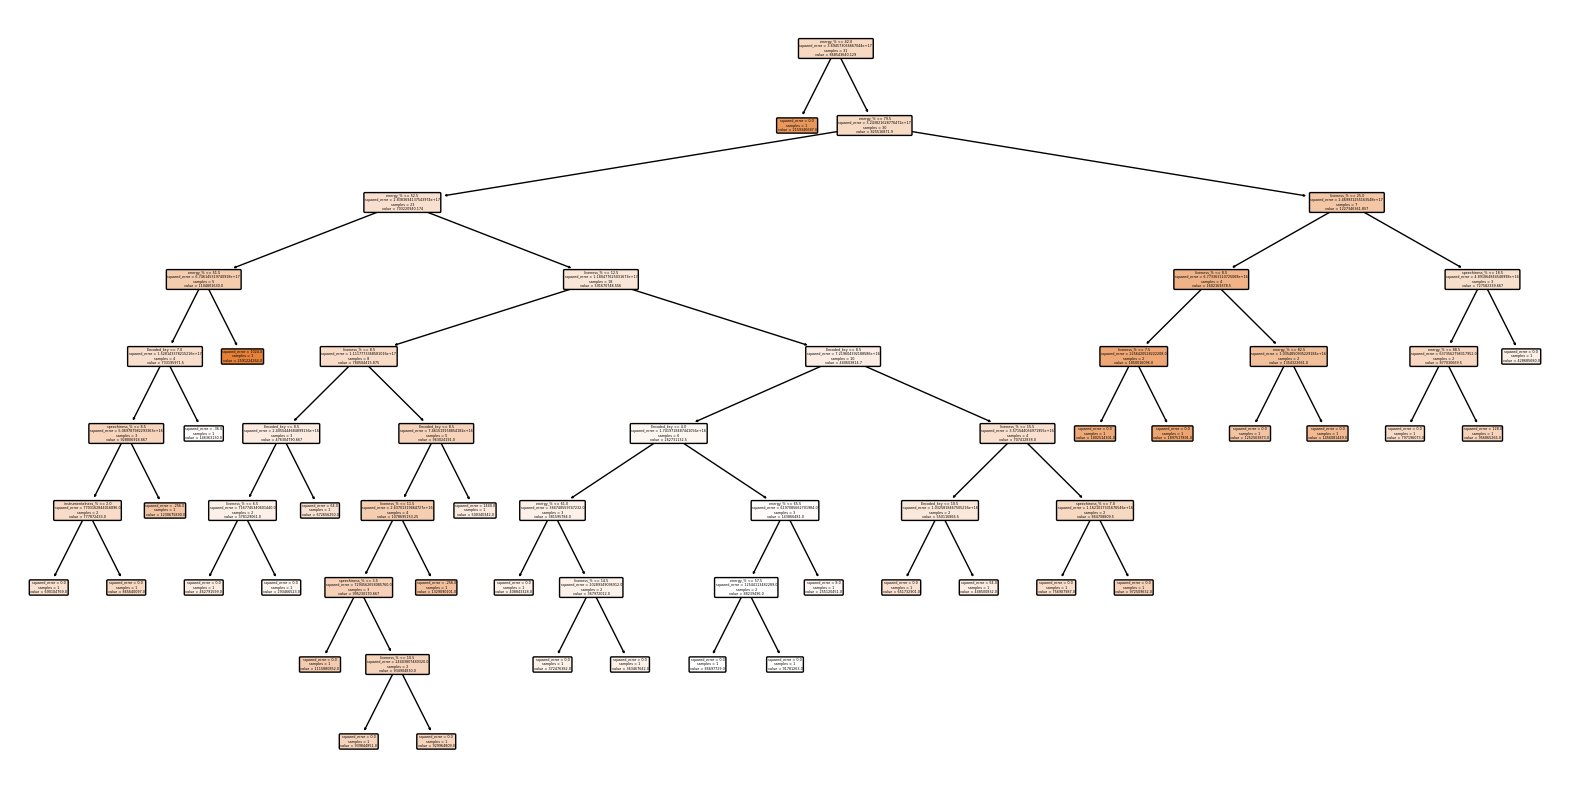

In [ ]:
#Extract features (X) and target values (y) from the dataframe
X =  danceLassoRegDF.drop(['streams', 'released_year'], axis=1)
y = danceLassoRegDF['streams']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create a decision tree regressor
tree_regressor = DecisionTreeRegressor()

#Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) as the evaluation metric
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_regressor, feature_names=X.columns, filled=True, rounded=True)
plt.show()

### Hip Hop

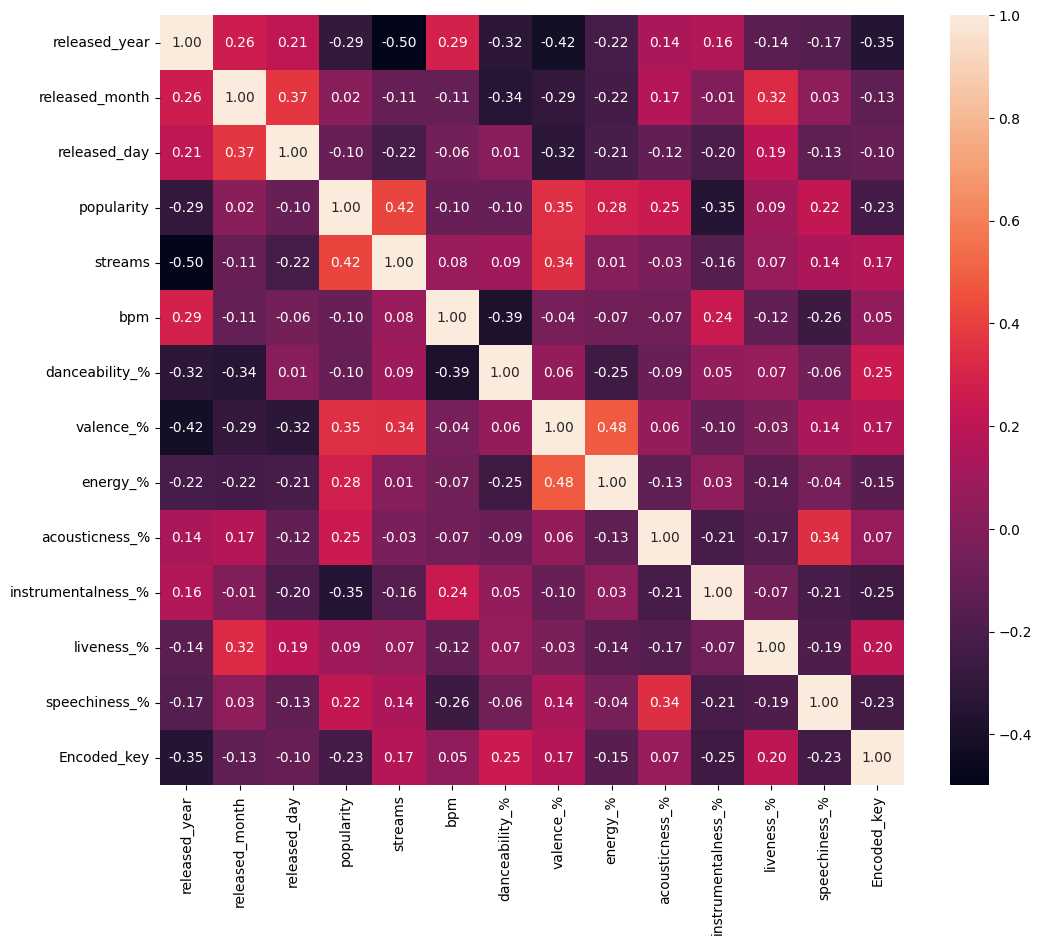

In [ ]:
#Create df based only on hip hop genre
hhDF = spotifyCombined[spotifyCombined['track_genre'].isin(['hip-hop'])]

#Create a new DataFrame with only numeric columns
hhDF = hhDF[cols]

# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(hhDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hhDF.drop('streams', axis=1), hhDF['streams'], test_size=0.2, random_state=42)

# Create and fit the Lasso regression model
lasso = Lasso(alpha=0.1)  # Set the alpha parameter for regularization
lasso.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lasso.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Print the coefficients of the model
print("Coefficients:", lasso.coef_)

Root Mean Squared Error: 768404348.6616807
Coefficients: [-56545645.11500479    723694.70088071  -5796747.51167384
  -1375667.43690296   8338624.48234503   3132734.84300897
   7064507.40462832 -22834232.72196284   8145241.38816849
 -85422360.73870741   3155561.30747859  -3873129.50150676
 -64591851.89549123]


In [ ]:
# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': hhDF.drop('streams', axis=1).columns, 'Coefficient': lasso.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[coeffDF['Coefficient'] < 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
hhLassoRegDF = hhDF[negFeat + ['streams']]

# Print the new DataFrame
display(hhLassoRegDF)

               Feature   Coefficient
0        released_year -5.654565e+07
1       released_month  7.236947e+05
2         released_day -5.796748e+06
3           popularity -1.375667e+06
4                  bpm  8.338624e+06
5       danceability_%  3.132735e+06
6            valence_%  7.064507e+06
7             energy_% -2.283423e+07
8       acousticness_%  8.145241e+06
9   instrumentalness_% -8.542236e+07
10          liveness_%  3.155561e+06
11       speechiness_% -3.873130e+06
12         Encoded_key -6.459185e+07


released_year  released_day  popularity  energy_%  instrumentalness_%  \
85             2022             6          99        78                   3   
112            2014             9          88        52                   0   
123            2002             1          88        66                   0   
134            2010             1          74        92                   0   
147            2022            17          91        67                   0   
271            2000             1          87        66                   0   
281            2002            26          86        76                   0   
322            2022            15          89        74                   0   
342            2022            12          66        51                   0   
349            2022            22          90        72                   0   
590            2020            18          83        51                   0   
593            2021            17          87        85                   0   
603            2021            30           4        41                   0   
684            2019             1          79        70                   0   
703            2021             3          83        47                   0   
756            2002             1          83        71                   0   
770            2017            30          84        60                   0   
771            1999            21          85        74                   0   
814            2022            18           1        58                   0   
869            2022             8           1        56                   0   
935            2022            13          83        66                   0   
956            2022            13          82        74                   0   
974            2022             6           0        65                  10   
1030           2021            15          78        76                   0   
1032           2022            10          87        75                   0   
1172           2022            20          89        50                   0   
1229           2022            14           3        77                   0   

      speechiness_%  Encoded_key       streams  
85                4            5  1.356565e+09  
112              33            1  1.791001e+09  
123               9           10  1.687664e+09  
134              24            3  1.279435e+09  
147              17            3  6.188855e+08  
271               6            8  1.424590e+09  
281               6            7  6.554668e+08  
322               7            1  7.238945e+08  
342               4            9  3.195669e+08  
349               5            5  3.325064e+08  
590              15           11  1.735442e+09  
593              22            4  9.207972e+08  
603              14            5  3.427794e+08  
684               9            7  1.138474e+09  
703              26            4  5.939176e+08  
756              37            9  1.202723e+09  
770              12            4  1.929770e+09  
771              21            9  9.189154e+08  
814               9            7  1.934439e+08  
869              10           11  6.945253e+08  
935              14            6  3.012421e+08  
956              27            4  2.373511e+08  
974               8            2  1.505010e+08  
1030             20            2  1.832732e+08  
1032              8            4  2.217529e+08  
1172             26            4  2.771323e+08  
1229             11           10  2.476891e+08

Root Mean Squared Error: 661078882.2611641


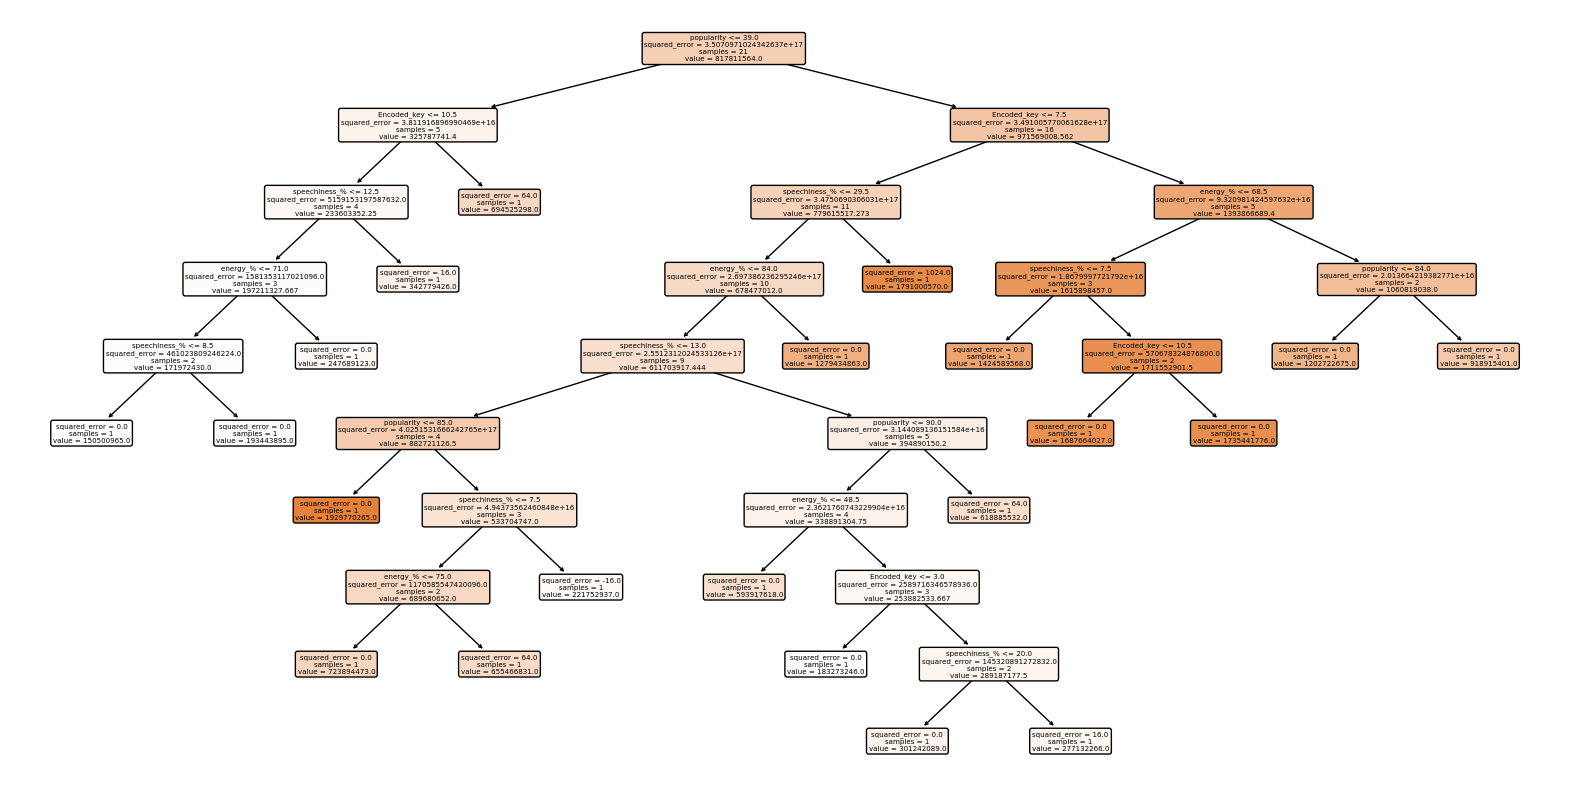

In [ ]:
#Extract features (X) and target values (y) from the dataframe
X =  hhLassoRegDF.drop(['streams', 'released_year', 'released_day'], axis=1)
y = hhLassoRegDF['streams']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create a decision tree regressor
tree_regressor = DecisionTreeRegressor()

#Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) as the evaluation metric
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_regressor, feature_names=X.columns, filled=True, rounded=True)
plt.show()

### K-Pop

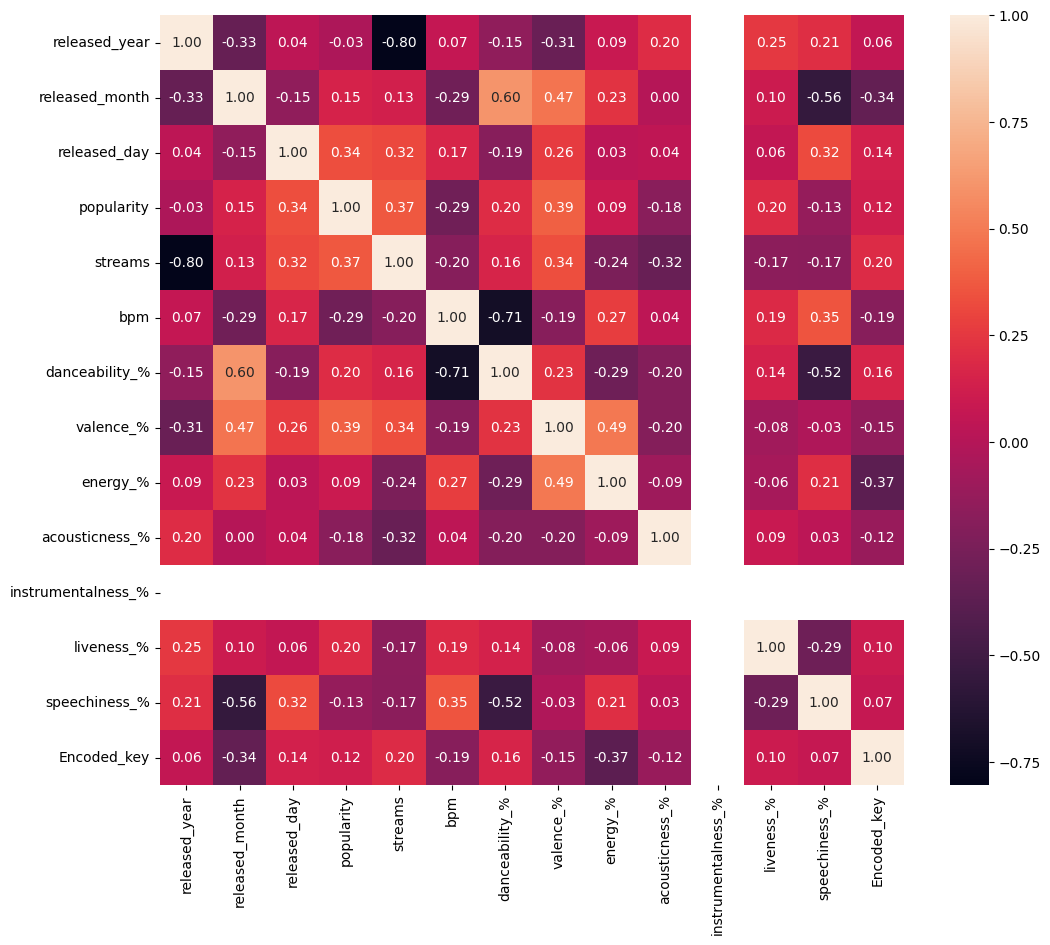

In [ ]:
#Create df based only on hip hop genre
kpopDF = spotifyCombined[spotifyCombined['track_genre'].isin(['k-pop'])]

#Create a new DataFrame with only numeric columns
kpopDF = kpopDF[cols]

# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(kpopDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(kpopDF.drop('streams', axis=1), kpopDF['streams'], test_size=0.2, random_state=42)

# Create and fit the Lasso regression model
lasso = Lasso(alpha=0.1)  # Set the alpha parameter for regularization
lasso.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lasso.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Print the coefficients of the model
print("Coefficients:", lasso.coef_)

Root Mean Squared Error: 615178989.7428663
Coefficients: [-5.84406965e+08 -1.82255553e+07  6.90866172e+06  3.45132671e+07
 -6.66139979e+05 -6.46565644e+05  6.01618800e+06 -3.13192538e+06
 -2.45377216e+07  0.00000000e+00  3.33931863e+06  8.70087142e+06
  1.46115383e+07]


In [ ]:
# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': kpopDF.drop('streams', axis=1).columns, 'Coefficient': lasso.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[coeffDF['Coefficient'] < 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
kpopLassoRegDF = kpopDF[negFeat + ['streams']]

# Print the new DataFrame
display(kpopLassoRegDF)

               Feature   Coefficient
0        released_year -5.844070e+08
1       released_month -1.822556e+07
2         released_day  6.908662e+06
3           popularity  3.451327e+07
4                  bpm -6.661400e+05
5       danceability_% -6.465656e+05
6            valence_%  6.016188e+06
7             energy_% -3.131925e+06
8       acousticness_% -2.453772e+07
9   instrumentalness_%  0.000000e+00
10          liveness_%  3.339319e+06
11       speechiness_%  8.700871e+06
12         Encoded_key  1.461154e+07


released_year  released_month  bpm  danceability_%  energy_%  \
277            2022               9  110              82        69   
348            2022              10  105              88        80   
369            2022               8   90              80        69   
628            2021               5  110              79        36   
635            2020               8  114              75        77   
653            2021              12  120              83        73   
664            2021              10  120              81        90   
737            2021               7  125              70        74   
864            2022               2  200              39        77   
919            2022               4  118              70        71   
928            2022               3  120              58        80   
990            2022               4  100              87        60   
991            2022               5  104              86        62   
1000           2022               6  172              56        89   
1002           2022               6   77              72        82   
1004           2022               6  117              63        51   
1012           2022               6  158              60        84   
1035           2022               7   97              78        72   
1170           2022               8  125              68        92   
1171           2022               8  120              77        91   
1242           2022               9  132              92        62   

      acousticness_%       streams  
277                0  4.821752e+08  
348                8  3.010517e+08  
369                2  5.513059e+08  
628                0  1.143648e+09  
635                1  1.692898e+09  
653                6  2.477379e+08  
664                9  3.459036e+08  
737                1  6.083340e+08  
864                4  1.354443e+08  
919                0  3.057711e+08  
928               15  2.122350e+08  
990                1  1.369963e+08  
991                5  2.294979e+08  
1000               4  3.020066e+08  
1002               2  3.308811e+08  
1004              43  1.145463e+08  
1012               4  7.909527e+07  
1035               1  1.557958e+08  
1170              10  2.655488e+08  
1171              14  1.894761e+08  
1242               7  2.355493e+08

Root Mean Squared Error: 124810653.90789562


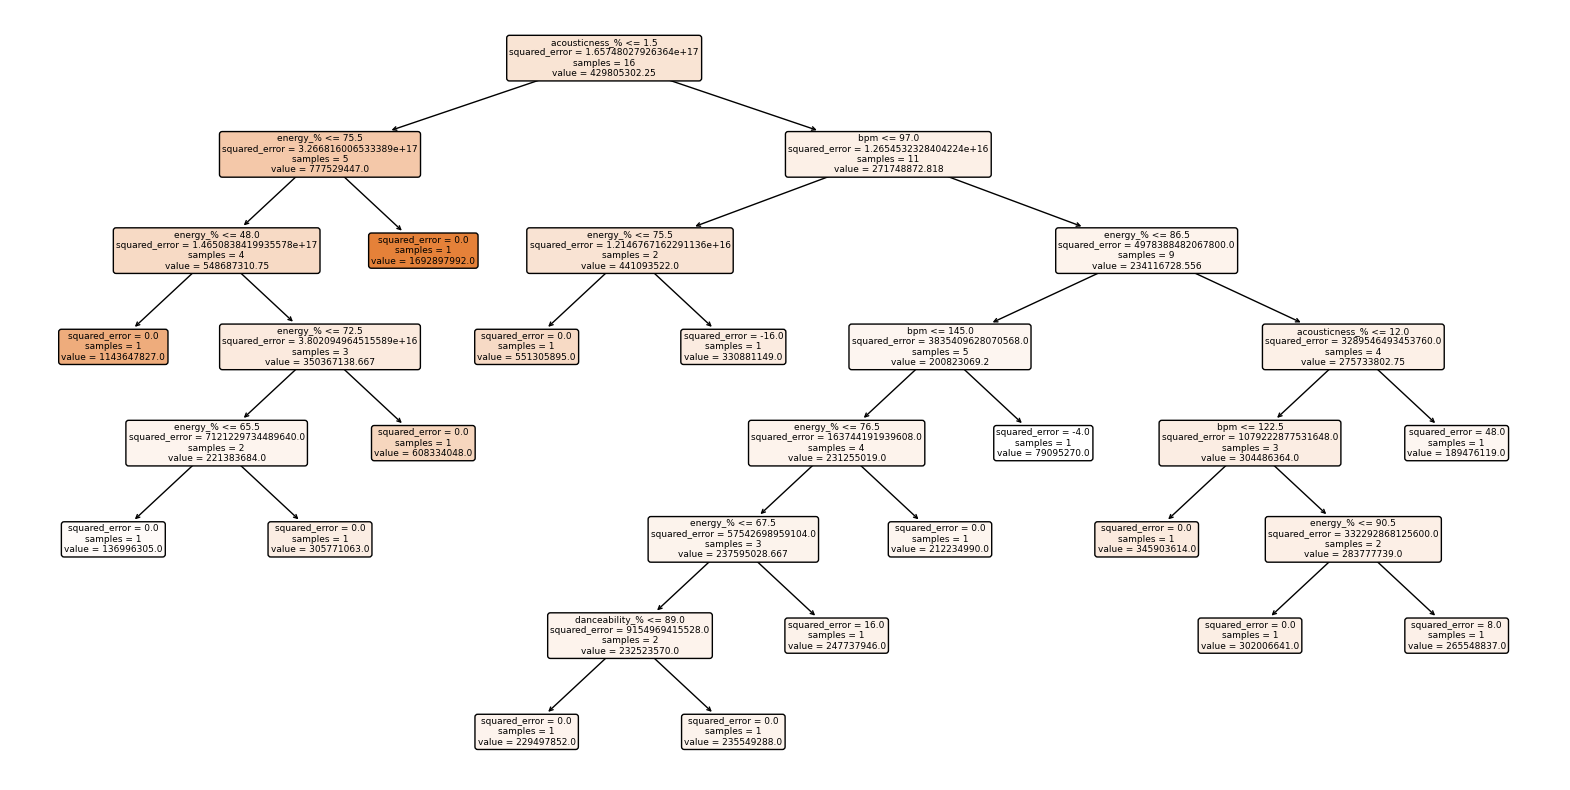

In [ ]:
#Extract features (X) and target values (y) from the dataframe
X =  kpopLassoRegDF.drop(['streams', 'released_year', 'released_month'], axis=1)
y = kpopLassoRegDF['streams']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create a decision tree regressor
tree_regressor = DecisionTreeRegressor()

#Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) as the evaluation metric
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_regressor, feature_names=X.columns, filled=True, rounded=True)
plt.show()

### Latin

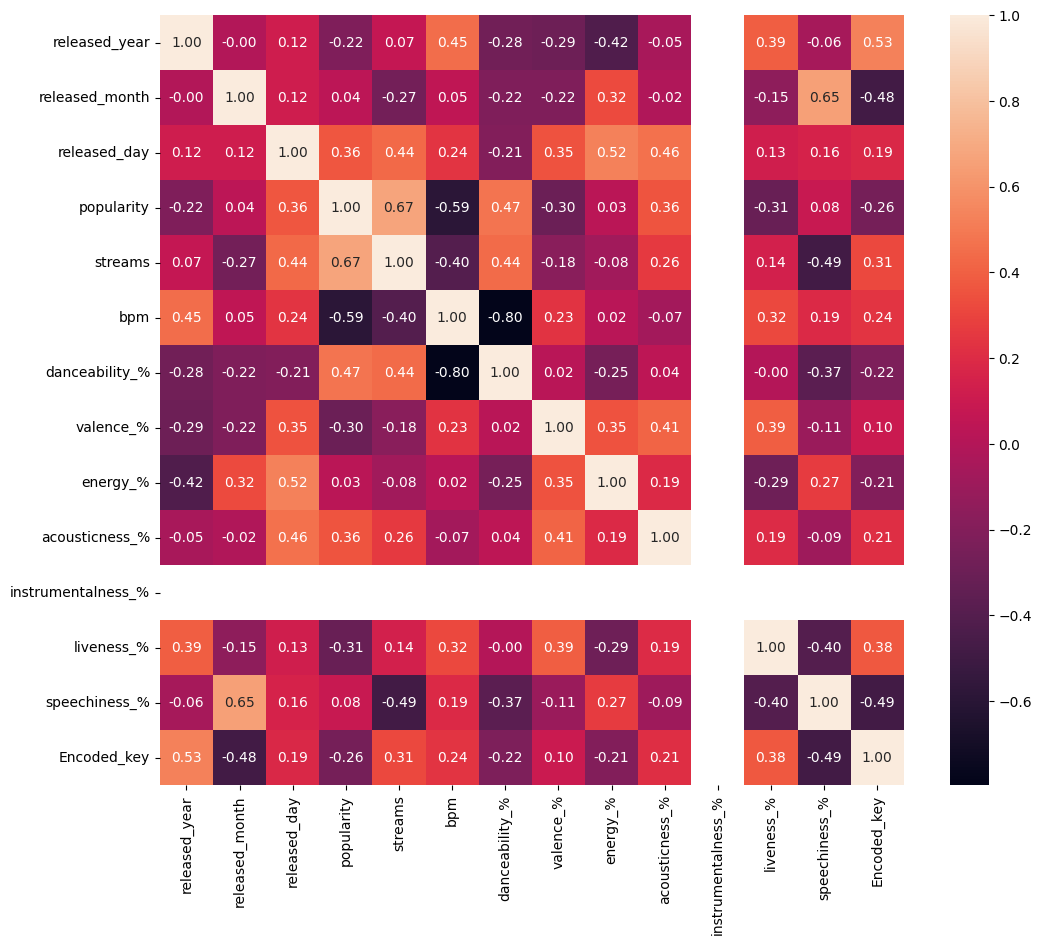

In [ ]:
#Create df based only on hip hop genre
latinDF = spotifyCombined[spotifyCombined['track_genre'].isin(['latin'])]

#Create a new DataFrame with only numeric columns
latinDF = latinDF[cols]

# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(latinDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(latinDF.drop('streams', axis=1), latinDF['streams'], test_size=0.2, random_state=42)

# Create and fit the Lasso regression model
lasso = Lasso(alpha=0.1)  # Set the alpha parameter for regularization
lasso.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lasso.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Print the coefficients of the model
print("Coefficients:", lasso.coef_)

Root Mean Squared Error: 291864979.2691327
Coefficients: [-6629745.56106889 34599177.77025254 20662521.74820768  5029447.96667648
 -2519301.42788166 -3798256.15786982 -5402515.14260466 -2402797.56119813
 -4362668.08989733        0.         10584065.95451732 -8594121.84659592
 30294255.79676448]


In [ ]:
# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': latinDF.drop('streams', axis=1).columns, 'Coefficient': lasso.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[coeffDF['Coefficient'] < 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
latinLassoRegDF = latinDF[negFeat + ['streams']]

# Print the new DataFrame
display(latinLassoRegDF)

               Feature   Coefficient
0        released_year -6.629746e+06
1       released_month  3.459918e+07
2         released_day  2.066252e+07
3           popularity  5.029448e+06
4                  bpm -2.519301e+06
5       danceability_% -3.798256e+06
6            valence_% -5.402515e+06
7             energy_% -2.402798e+06
8       acousticness_% -4.362668e+06
9   instrumentalness_%  0.000000e+00
10          liveness_%  1.058407e+07
11       speechiness_% -8.594122e+06
12         Encoded_key  3.029426e+07


released_year  bpm  danceability_%  valence_%  energy_%  acousticness_%  \
32             2022  125              84         85        68              58   
37             2022   98              90         40        59               0   
167            2004   96              86         74        80              33   
205            2022  170              71         59        56               4   
243            2022   98              80         23        48              14   
316            2022  122              88         43        50               7   
344            2022  100              80         29        67              29   
353            2022  174              70         57        64              23   
571            2021  130              76         44        77               1   
810            2004   95              81         56        70               4   
1033           2022  120              81         72        65               4   
1137           2020  122              70         46        76              30   
1176           2022  164              70         58        57              25   
1204           2022  180              65         52        80               5   

      speechiness_%       streams  
32                4  1.214083e+09  
37               29  6.740727e+08  
167               6  6.577236e+08  
205              12  4.592764e+08  
243               5  1.047480e+09  
316               5  6.713660e+08  
344               3  9.090020e+08  
353              32  6.063617e+08  
571               3  1.309887e+09  
810              24  5.270331e+08  
1033              4  2.632804e+08  
1137             45  2.739143e+08  
1176              7  2.789200e+08  
1204             25  1.853926e+08

Root Mean Squared Error: 568477553.7582403


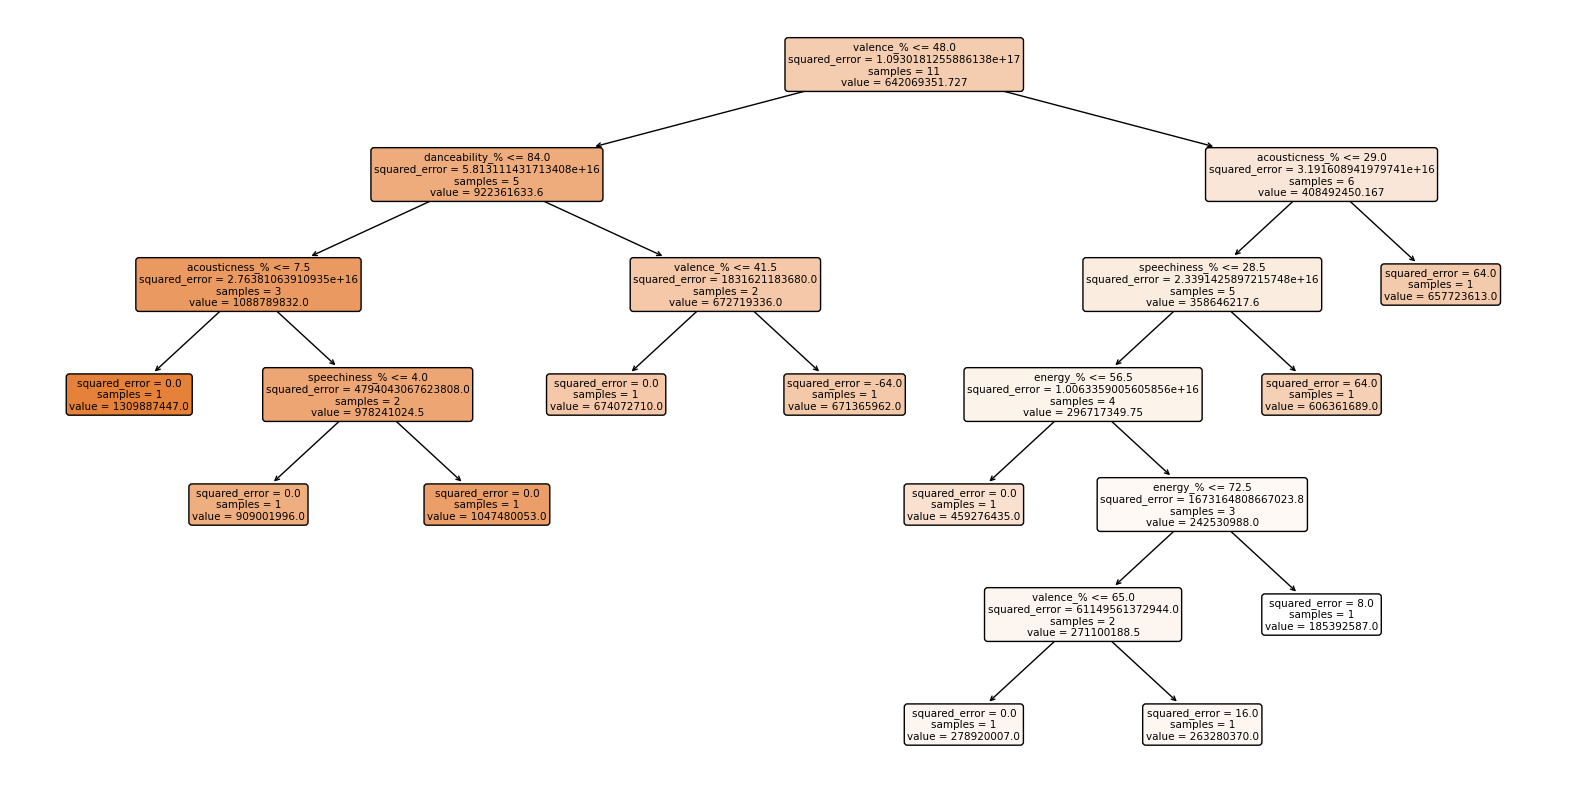

In [ ]:
#Extract features (X) and target values (y) from the dataframe
X =  latinLassoRegDF.drop(['streams', 'released_year'], axis=1)
y = latinLassoRegDF['streams']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create a decision tree regressor
tree_regressor = DecisionTreeRegressor()

#Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) as the evaluation metric
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_regressor, feature_names=X.columns, filled=True, rounded=True)
plt.show()

### latino

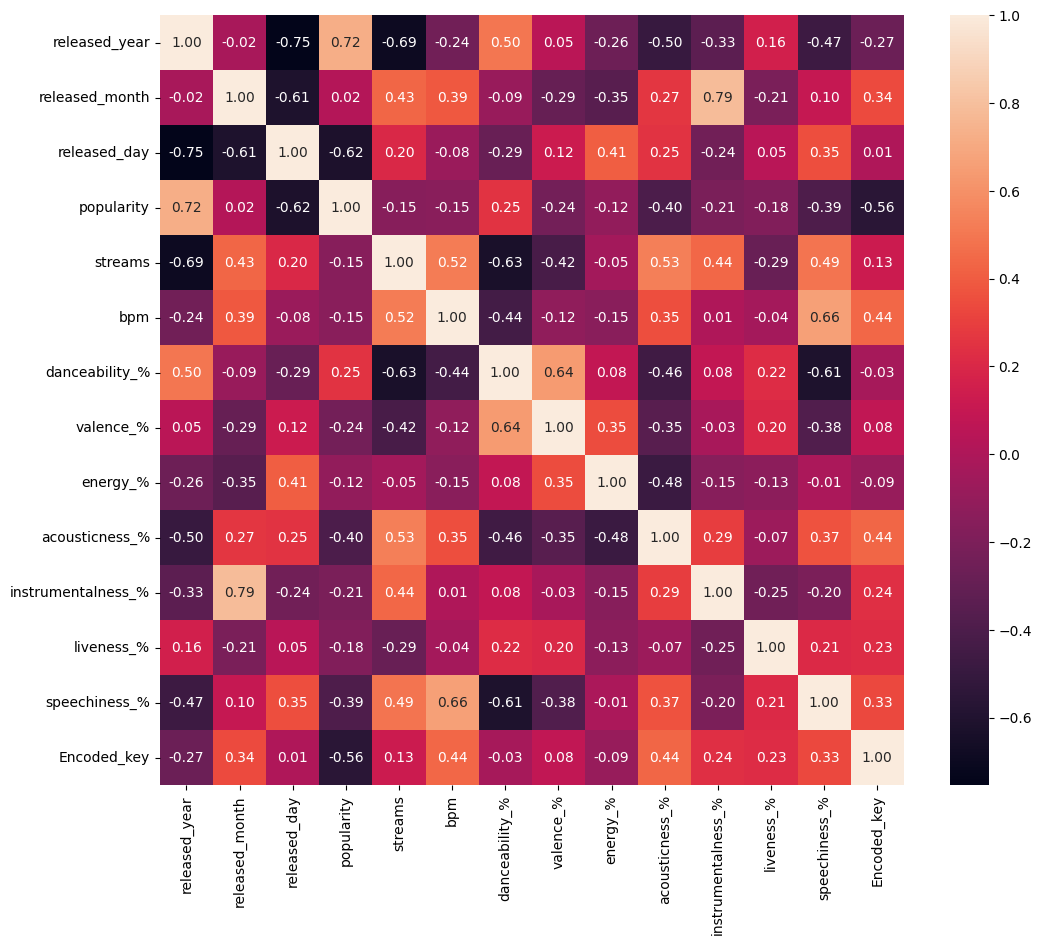

In [ ]:
#Create df based only on hip hop genre
latinoDF = spotifyCombined[spotifyCombined['track_genre'].isin(['latino'])]

#Create a new DataFrame with only numeric columns
latinoDF = latinoDF[cols]

# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(latinoDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(latinoDF.drop('streams', axis=1), latinoDF['streams'], test_size=0.2, random_state=42)

# Create and fit the Lasso regression model
lasso = Lasso(alpha=0.1)  # Set the alpha parameter for regularization
lasso.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lasso.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Print the coefficients of the model
print("Coefficients:", lasso.coef_)

Root Mean Squared Error: 387972451.46698856
Coefficients: [-3.49867570e+08  4.69670923e+07 -3.17775536e+05  3.94260624e+07
  3.81185841e+05  8.28141146e+06 -1.02768243e+06 -6.58215181e+06
 -1.55565347e+06  2.03911578e+08 -2.98175002e+06  1.80795457e+07
 -5.11369493e+07]


In [ ]:
# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': latinoDF.drop('streams', axis=1).columns, 'Coefficient': lasso.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[coeffDF['Coefficient'] < 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
latinoLassoRegDF = latinoDF[negFeat + ['streams']]

# Print the new DataFrame
display(latinoLassoRegDF)

               Feature   Coefficient
0        released_year -3.498676e+08
1       released_month  4.696709e+07
2         released_day -3.177755e+05
3           popularity  3.942606e+07
4                  bpm  3.811858e+05
5       danceability_%  8.281411e+06
6            valence_% -1.027682e+06
7             energy_% -6.582152e+06
8       acousticness_% -1.555653e+06
9   instrumentalness_%  2.039116e+08
10          liveness_% -2.981750e+06
11       speechiness_%  1.807955e+07
12         Encoded_key -5.113695e+07


released_year  released_day  valence_%  energy_%  acousticness_%  \
376           2021             4         44        65              28   
566           2022             6         47        80               2   
612           2020             2         57        63              40   
659           2021             8         63        77              14   
772           2020            29         89        79              17   
821           2020            29         81        80              20   
957           2022             6         22        55              31   
960           2022             6         93        59              28   
962           2022             6         43        65              23   
964           2022             6         50        67              12   
966           2022             6         74        69              21   
968           2022             6         67        65              42   
970           2019            31         24        62              60   
987           2022             6         72        58               9   

     liveness_%  Encoded_key       streams  
376          14            4  1.260594e+09  
566          24            0  6.145551e+08  
612          10            6  1.168643e+09  
659          15            8  5.136439e+08  
772          11            3  6.850718e+08  
821          25            4  3.126229e+08  
957          12            3  4.172304e+08  
960          17            3  3.131133e+08  
962           9            1  3.056503e+08  
964          13            4  3.384220e+08  
966          18            2  4.032316e+08  
968          35            9  2.833592e+08  
970          24            5  1.304314e+09  
987          49            4  2.461278e+08

Root Mean Squared Error: 779185029.6879935


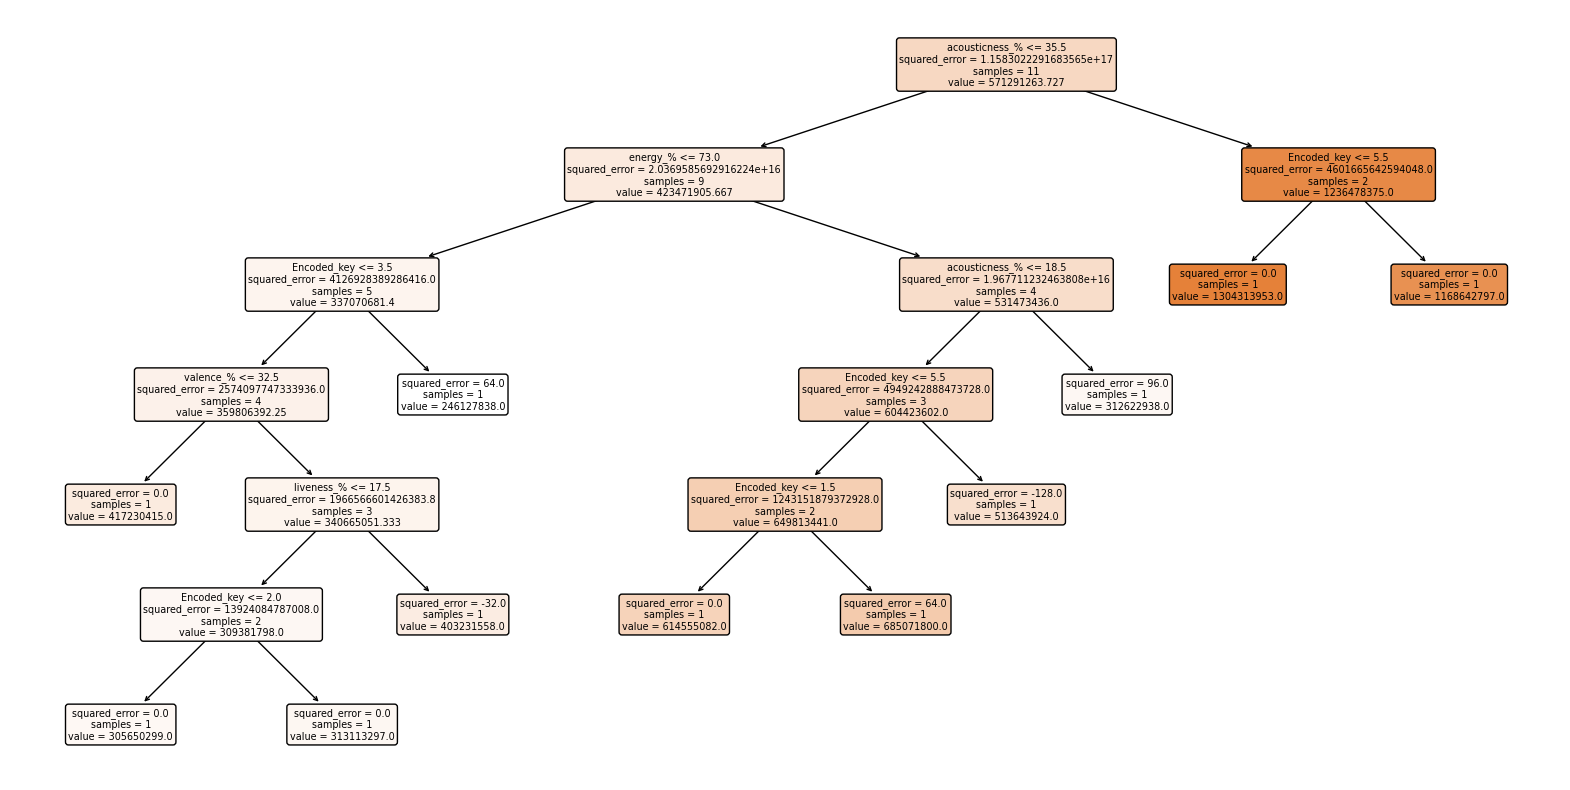

In [ ]:
#Extract features (X) and target values (y) from the dataframe
X =  latinoLassoRegDF.drop(['streams', 'released_year', 'released_day'], axis=1)
y = latinoLassoRegDF['streams']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create a decision tree regressor
tree_regressor = DecisionTreeRegressor()

#Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) as the evaluation metric
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_regressor, feature_names=X.columns, filled=True, rounded=True)
plt.show()

### Indie-pop

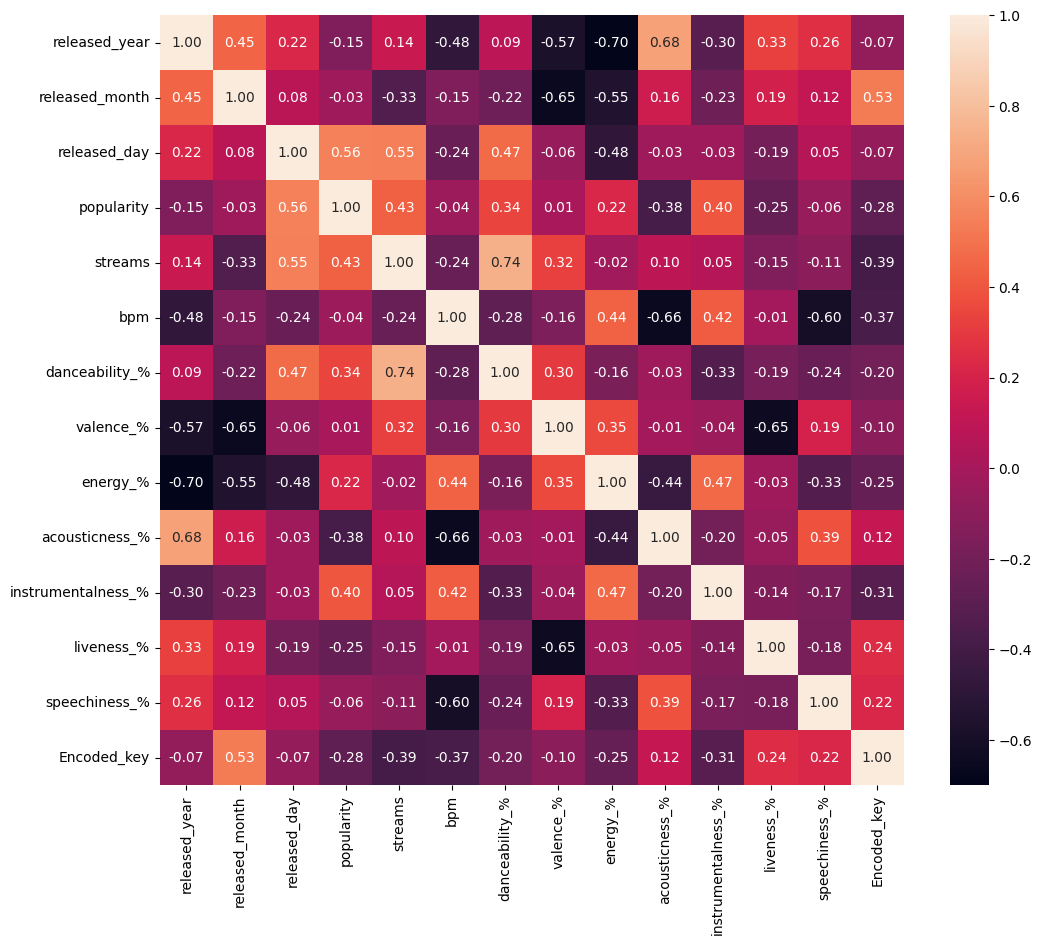

In [ ]:
#Create df based only on hip hop genre
ipopDF = spotifyCombined[spotifyCombined['track_genre'].isin(['indie-pop'])]

#Create a new DataFrame with only numeric columns
ipopDF = ipopDF[cols]

# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(ipopDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ipopDF.drop('streams', axis=1), ipopDF['streams'], test_size=0.2, random_state=42)

# Create and fit the Lasso regression model
lasso = Lasso(alpha=0.1)  # Set the alpha parameter for regularization
lasso.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lasso.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Print the coefficients of the model
print("Coefficients:", lasso.coef_)

Root Mean Squared Error: 1058290430.6413327
Coefficients: [-30567647.89797974 -12901864.87306127  -5624505.01866197
  -7307816.00635712    -58311.52935709  17628063.22744825
  -1197424.06093127  -3268183.12131586   1872439.8224011
  13054149.29094494  11276196.60149314   6625891.16801527
  -5566688.76409257]


In [ ]:
# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': ipopDF.drop('streams', axis=1).columns, 'Coefficient': lasso.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[coeffDF['Coefficient'] < 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
ipopLassoRegDF = ipopDF[negFeat + ['streams']]

# Print the new DataFrame
display(ipopLassoRegDF)

               Feature   Coefficient
0        released_year -3.056765e+07
1       released_month -1.290186e+07
2         released_day -5.624505e+06
3           popularity -7.307816e+06
4                  bpm -5.831153e+04
5       danceability_%  1.762806e+07
6            valence_% -1.197424e+06
7             energy_% -3.268183e+06
8       acousticness_%  1.872440e+06
9   instrumentalness_%  1.305415e+07
10          liveness_%  1.127620e+07
11       speechiness_%  6.625891e+06
12         Encoded_key -5.566689e+06


released_year  released_month  released_day  popularity  bpm  valence_%  \
43             2020               6            28          85   81         53   
77             2022               7            15          81   94         14   
274            2014               6             5          83  105         57   
351            2015               1             1          73  147         62   
640            2015               5            10          86  180         41   
757            2019               8             4          76  141         17   
766            2019              10             4          83  145         23   
768            2019               6            21          83   89         43   
784            2019              10             4          80   88         31   
786            2019              10             4          75   80         45   
819            2021               9             3          73  129         33   
994            2017              10            20          80  150         27   
1227           2018              11            21          80  130         24   

      energy_%  Encoded_key       streams  
43          53            2  2.557976e+09  
77          59            4  7.511345e+08  
274         87            8  4.662320e+08  
351         79            3  7.897539e+08  
640         94            0  8.244202e+08  
757         67            6  4.262048e+08  
766         66            2  5.548757e+08  
768         43            3  4.677270e+08  
784         63            8  5.639029e+08  
786         55           11  2.036803e+08  
819         44            2  3.461278e+08  
994         56            7  1.847066e+08  
1227        37           10  7.230439e+08

Root Mean Squared Error: 1214908653.5861425


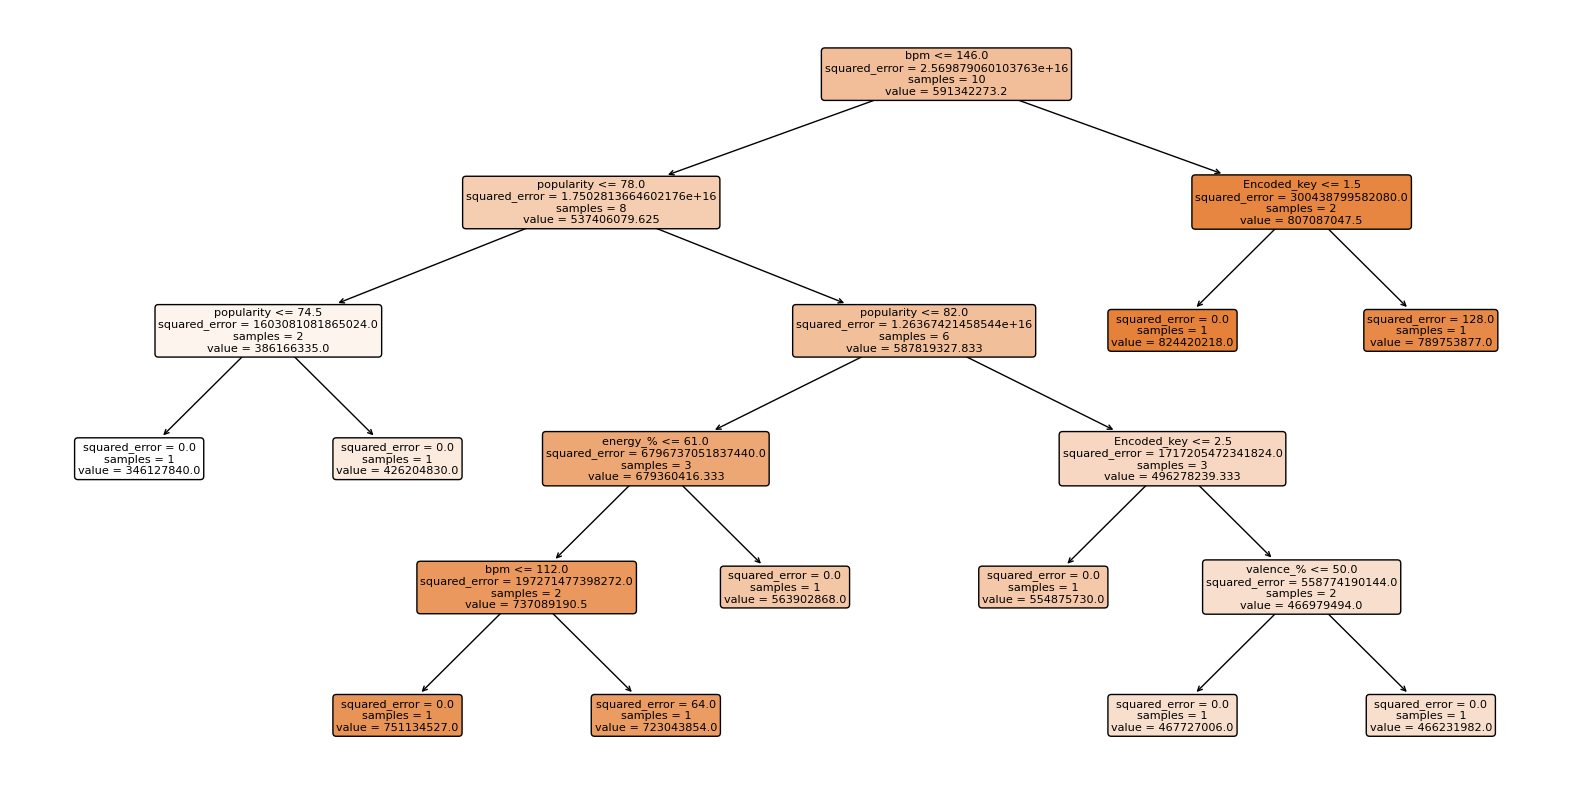

In [ ]:
#Extract features (X) and target values (y) from the dataframe
X =  ipopLassoRegDF.drop(['streams', 'released_year', 'released_month', 'released_day'], axis=1)
y = ipopLassoRegDF['streams']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create a decision tree regressor
tree_regressor = DecisionTreeRegressor()

#Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) as the evaluation metric
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_regressor, feature_names=X.columns, filled=True, rounded=True)
plt.show()

### Rock

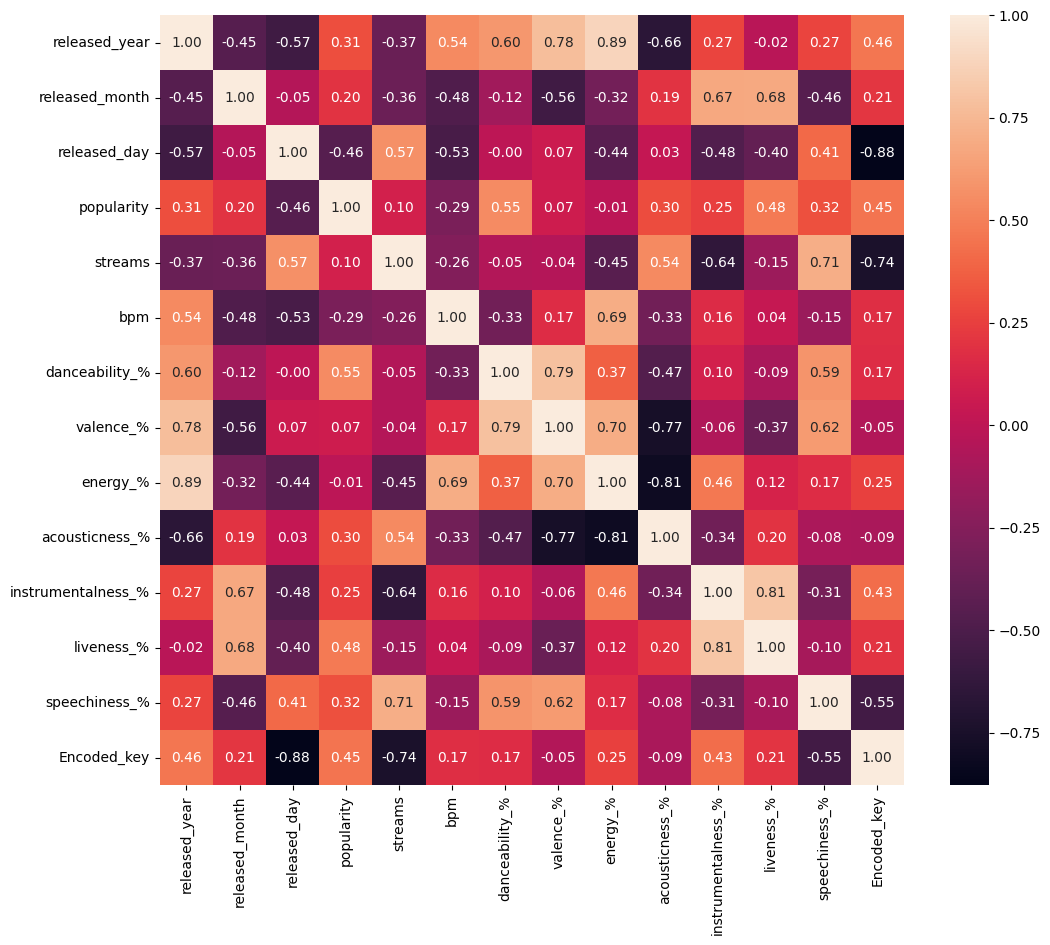

In [ ]:
#Create df based only on hip hop genre
rockDF = spotifyCombined[spotifyCombined['track_genre'].isin(['rock'])]

#Create a new DataFrame with only numeric columns
rockDF = rockDF[cols]

# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(rockDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(rockDF.drop('streams', axis=1), rockDF['streams'], test_size=0.2, random_state=42)

# Create and fit the Lasso regression model
lasso = Lasso(alpha=0.1)  # Set the alpha parameter for regularization
lasso.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lasso.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Print the coefficients of the model
print("Coefficients:", lasso.coef_)

Root Mean Squared Error: 1488454472.883853
Coefficients: [-27560213.49426427 -77531174.80015866  -6236758.46528575
   5251144.00164647  -2690845.05176145 -20655605.96490251
 -10081794.32245779   1275708.64069986   2542837.80241257
  45163182.83976999    642491.55734255  35193926.53492072
   8839405.27054887]


In [ ]:
# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': rockDF.drop('streams', axis=1).columns, 'Coefficient': lasso.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[coeffDF['Coefficient'] < 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
rockLassoRegDF = rockDF[negFeat + ['streams']]

# Print the new DataFrame
display(hhLassoRegDF)

               Feature   Coefficient
0        released_year -2.756021e+07
1       released_month -7.753117e+07
2         released_day -6.236758e+06
3           popularity  5.251144e+06
4                  bpm -2.690845e+06
5       danceability_% -2.065561e+07
6            valence_% -1.008179e+07
7             energy_%  1.275709e+06
8       acousticness_%  2.542838e+06
9   instrumentalness_%  4.516318e+07
10          liveness_%  6.424916e+05
11       speechiness_%  3.519393e+07
12         Encoded_key  8.839405e+06


released_year  released_day  popularity  energy_%  instrumentalness_%  \
85             2022             6          99        78                   3   
112            2014             9          88        52                   0   
123            2002             1          88        66                   0   
134            2010             1          74        92                   0   
147            2022            17          91        67                   0   
271            2000             1          87        66                   0   
281            2002            26          86        76                   0   
322            2022            15          89        74                   0   
342            2022            12          66        51                   0   
349            2022            22          90        72                   0   
590            2020            18          83        51                   0   
593            2021            17          87        85                   0   
603            2021            30           4        41                   0   
684            2019             1          79        70                   0   
703            2021             3          83        47                   0   
756            2002             1          83        71                   0   
770            2017            30          84        60                   0   
771            1999            21          85        74                   0   
814            2022            18           1        58                   0   
869            2022             8           1        56                   0   
935            2022            13          83        66                   0   
956            2022            13          82        74                   0   
974            2022             6           0        65                  10   
1030           2021            15          78        76                   0   
1032           2022            10          87        75                   0   
1172           2022            20          89        50                   0   
1229           2022            14           3        77                   0   

      speechiness_%  Encoded_key       streams  
85                4            5  1.356565e+09  
112              33            1  1.791001e+09  
123               9           10  1.687664e+09  
134              24            3  1.279435e+09  
147              17            3  6.188855e+08  
271               6            8  1.424590e+09  
281               6            7  6.554668e+08  
322               7            1  7.238945e+08  
342               4            9  3.195669e+08  
349               5            5  3.325064e+08  
590              15           11  1.735442e+09  
593              22            4  9.207972e+08  
603              14            5  3.427794e+08  
684               9            7  1.138474e+09  
703              26            4  5.939176e+08  
756              37            9  1.202723e+09  
770              12            4  1.929770e+09  
771              21            9  9.189154e+08  
814               9            7  1.934439e+08  
869              10           11  6.945253e+08  
935              14            6  3.012421e+08  
956              27            4  2.373511e+08  
974               8            2  1.505010e+08  
1030             20            2  1.832732e+08  
1032              8            4  2.217529e+08  
1172             26            4  2.771323e+08  
1229             11           10  2.476891e+08

Root Mean Squared Error: 978116202.1360803


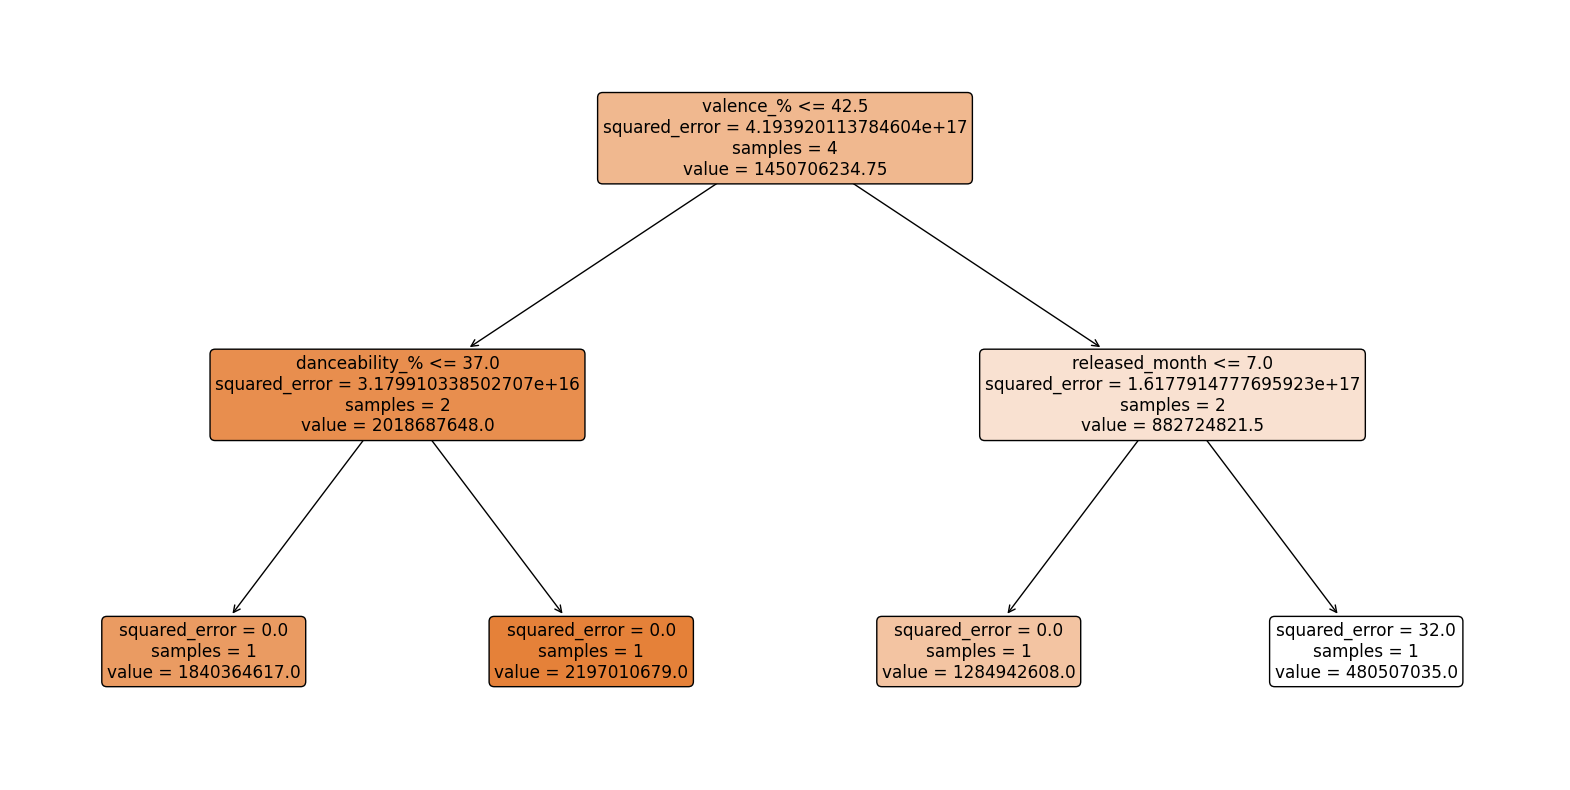

In [ ]:
#Extract features (X) and target values (y) from the dataframe
X =  rockLassoRegDF.drop(['streams', 'released_year', 'released_day'], axis=1)
y = rockLassoRegDF['streams']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create a decision tree regressor
tree_regressor = DecisionTreeRegressor()

#Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) as the evaluation metric
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_regressor, feature_names=X.columns, filled=True, rounded=True)
plt.show()

## Clustering

latin                14
latino               14
indie-pop            13
rock                  6

### Spoticy 2023

#### Determine optimal amount of clusters

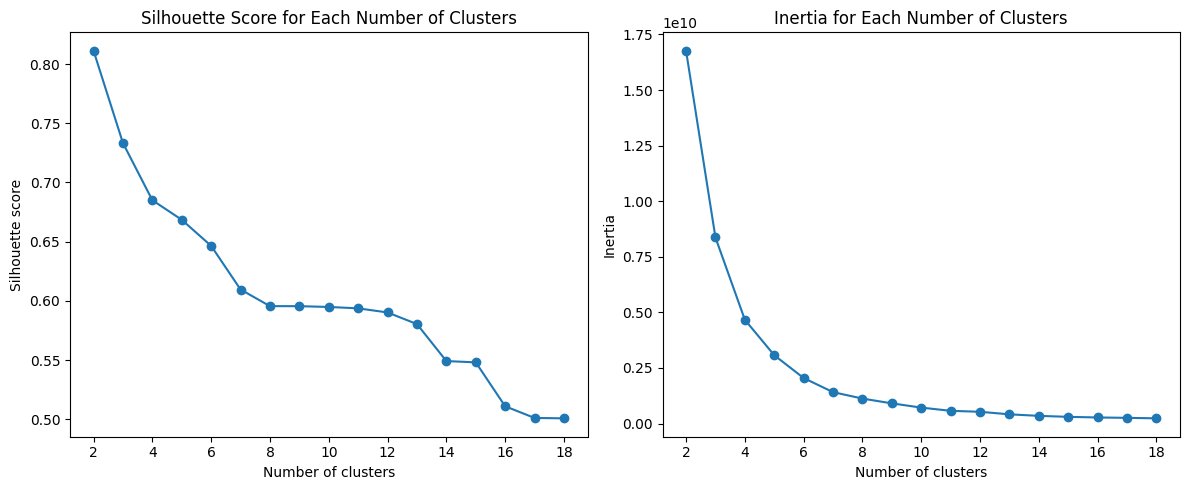

In [ ]:
#Remove streams (our response variable)
spotifySmallKmeans = spotifyDFRegression.drop(columns=['streams'])

# Initialize lists to store silhouette scores and inertia values
silhouette_scores = []
inertia_values = []

# Range of clusters to try
range_of_clusters = range(2, 19)

# Calculate silhouette score and inertia value for each number of clusters
for n_clusters in range_of_clusters:
    # Fit KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(spotifySmallKmeans)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(spotifySmallKmeans, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    # Calculate inertia value
    inertia_values.append(kmeans.inertia_)

# Plot silhouette scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range_of_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score for Each Number of Clusters')

# Plot inertia values
plt.subplot(1, 2, 2)
plt.plot(range_of_clusters, inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia for Each Number of Clusters')

plt.tight_layout()
plt.show()


Looks like 9 clusters is the optimal here. It is not very indicative however as the silhouette score is not the highest, but this is where it hops back up and the inertia value starts to level off.

In [ ]:

# Instantiate and fit KMeans model
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(spotifySmallKmeans)
# Get cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=spotifySmallKmeans.columns)
print("Cluster Centers:")
print(cluster_centers)

# Predict cluster labels for each customer
cluster_labels = kmeans.predict(spotifySmallKmeans)
spotifySmallKmeans['Cluster'] = cluster_labels

# Analyze cluster characteristics
cluster_summary = spotifySmallKmeans.groupby('Cluster').agg({
    'in_apple_playlists': ['mean', 'min', 'max', 'count'],
    'in_apple_charts': ['mean', 'min', 'max', 'count'],
    'in_deezer_charts': ['mean', 'min', 'max', 'count'],
    'bpm': ['mean', 'min', 'max', 'count'],
    'danceability_%': ['mean', 'min', 'max', 'count'],
    'valence_%': ['mean', 'min', 'max', 'count'],
    'energy_%': ['mean', 'min', 'max', 'count'],
    'acousticness_%': ['mean', 'min', 'max', 'count'],
    'instrumentalness_%': ['mean', 'min', 'max', 'count'],
    'liveness_%': ['mean', 'min', 'max', 'count'],
    'speechiness_%': ['mean', 'min', 'max', 'count'],
    'key_encoded': ['mean', 'min', 'max', 'count'],
}).reset_index()

print("\nCluster Summary:")
print(cluster_summary)

Cluster Centers:
   artist_count  released_year  released_month  released_day  \
0      1.680387    2021.331719        6.113801     13.796610   
1      1.272727    2008.500000        3.363636      7.681818   
2      1.480000    2011.820000        4.920000     12.260000   
3      1.627119    2017.889831        5.923729     13.822034   
4      1.444444    1997.777778        5.444444     13.777778   
5      1.235294    2008.647059        5.294118     13.676471   
6      1.259740    2010.636364        6.662338     15.025974   
7      1.493333    2020.440000        6.413333     15.035556   
8      1.500000    2005.000000        5.000000      8.750000   

   in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
0            812.912833           8.903148           18.014528   
1          30714.863636          19.318182          228.909091   
2          14416.060000          18.680000          188.860000   
3           5296.550847          12.355932           92.000000   
4          4